# Example code for Machine Learning - Credit Risk Model
  
This is an extract of code in Python to implement the solution to the exercise for **Risk Assessment**.  
  
Main steps included are:
- Exploration of fields, to discard needed ones and identify categorical / other transformations
- EDA (Exploratory Data Analysis)
- Model training and scoring
- Final proposed solution
  
For each step, I will include both in-line comments and mark-up text to explain every decision and action taken.

## Load of Train dataset
Also, we will inspect data and apply transformations and feature removal when apply

In [128]:
import numpy as np
import pandas as pd

import os
#Models storage
from sklearn.externals import joblib

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import Imputer

from sklearn.model_selection import train_test_split

#Selección de variables. Usamos sólo este sistema de selección, para no eternizar los pipelines, pero podrían añadirse más
from sklearn.feature_selection import RFECV

#Imports para valoración y entrenamiento de modelos. Clasificación
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import train dataset, raw, to work with
df_train = pd.read_csv("RAcredit_train.csv", sep=",")

df_train.head(n=40)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,l_state
0,43294,NaN,3000.0,3000.0,3000.0,36 months,7.35,93.12,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
1,46928,NaN,7500.0,7500.0,7500.0,36 months,9.93,241.76,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
2,38127,NaN,11750.0,11750.0,11750.0,60 months,30.17,381.39,F,F3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
3,52957,NaN,6025.0,6025.0,6025.0,36 months,11.49,198.66,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
4,53411,NaN,17000.0,17000.0,17000.0,36 months,16.02,597.84,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
5,52392,NaN,5000.0,5000.0,4975.0,36 months,12.74,167.85,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
6,28204,NaN,12000.0,12000.0,12000.0,36 months,11.39,395.09,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
7,10319,NaN,28000.0,28000.0,28000.0,36 months,19.99,1040.44,D,D4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
8,2005,NaN,3600.0,3600.0,3600.0,36 months,8.24,113.21,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
9,79730,NaN,16000.0,16000.0,16000.0,36 months,7.97,501.17,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid


In [3]:
#List of columns of the dataframe
df_columns = df_train.columns
print("List of columns:")
_ = [print(str(i) + "\t" + column) for i, column in enumerate(df_columns)]   # _ to avoid printing empty array

List of columns:
0	id
1	member_id
2	loan_amnt
3	funded_amnt
4	funded_amnt_inv
5	term
6	int_rate
7	installment
8	grade
9	sub_grade
10	emp_title
11	emp_length
12	home_ownership
13	annual_inc
14	verification_status
15	issue_d
16	pymnt_plan
17	url
18	desc
19	purpose
20	title
21	zip_code
22	addr_state
23	dti
24	delinq_2yrs
25	earliest_cr_line
26	inq_last_6mths
27	mths_since_last_delinq
28	mths_since_last_record
29	open_acc
30	pub_rec
31	revol_bal
32	revol_util
33	total_acc
34	initial_list_status
35	out_prncp
36	out_prncp_inv
37	total_pymnt
38	total_pymnt_inv
39	total_rec_prncp
40	total_rec_int
41	total_rec_late_fee
42	recoveries
43	collection_recovery_fee
44	last_pymnt_d
45	last_pymnt_amnt
46	next_pymnt_d
47	last_credit_pull_d
48	collections_12_mths_ex_med
49	mths_since_last_major_derog
50	policy_code
51	application_type
52	annual_inc_joint
53	dti_joint
54	verification_status_joint
55	acc_now_delinq
56	tot_coll_amt
57	tot_cur_bal
58	open_acc_6m
59	open_il_6m
60	open_il_12m
61	open_il_24m
62

In [4]:
#We'll show general information about types on the dataframe. As we see, there's a number of numeric ones
# and a number of "objects" (strings, or undefined type, likely to act on them to discard / transform)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77450 entries, 0 to 77449
Columns: 136 entries, id to l_state
dtypes: float64(95), int64(1), object(40)
memory usage: 80.4+ MB


In [5]:
# We'll drop a number of empty columns, as they don't give usable data for the upcoming model. Referred by number
fields_del = [1,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134]
_ = [print(str(i) + "\t" + column) for i, column in enumerate(df_columns[fields_del])]
df_train_aux = df_train.drop(df_columns[fields_del], axis=1)    #dropping of empty / useless columns (1st strike)

0	member_id
1	revol_bal_joint
2	sec_app_earliest_cr_line
3	sec_app_inq_last_6mths
4	sec_app_mort_acc
5	sec_app_open_acc
6	sec_app_revol_util
7	sec_app_open_il_6m
8	sec_app_num_rev_accts
9	sec_app_chargeoff_within_12_mths
10	sec_app_collections_12_mths_ex_med
11	sec_app_mths_since_last_major_derog
12	hardship_flag
13	hardship_type
14	hardship_reason
15	hardship_status
16	deferral_term
17	hardship_amount
18	hardship_start_date
19	hardship_end_date
20	payment_plan_start_date
21	hardship_length
22	hardship_dpd
23	hardship_loan_status
24	orig_projected_additional_accrued_interest
25	hardship_payoff_balance_amount


In [6]:
#Refresh of column list and recheck of the status of the dataframe
df_columns = df_train_aux.columns
df_train_aux.head(n=40)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,l_state
0,43294,3000.0,3000.0,3000.0,36 months,7.35,93.12,A,A4,PDM Specialist,...,0.0,100.0,0.0,0.0,0.0,208114.0,17136.0,25000.0,22339.0,Fully Paid
1,46928,7500.0,7500.0,7500.0,36 months,9.93,241.76,B,B2,Parole Agent,...,0.0,62.5,33.3,0.0,0.0,170642.0,12044.0,5200.0,22132.0,Fully Paid
2,38127,11750.0,11750.0,11750.0,60 months,30.17,381.39,F,F3,Assistant Store Manager,...,2.0,83.3,50.0,0.0,0.0,211624.0,52108.0,9900.0,71124.0,Fully Paid
3,52957,6025.0,6025.0,6025.0,36 months,11.49,198.66,B,B5,Chief Broadcast Engineer,...,1.0,88.9,50.0,0.0,0.0,424958.0,17314.0,8400.0,19558.0,Fully Paid
4,53411,17000.0,17000.0,17000.0,36 months,16.02,597.84,C,C5,Branch Manager,...,8.0,100.0,75.0,0.0,0.0,545061.0,137613.0,40700.0,103138.0,Fully Paid
5,52392,5000.0,5000.0,4975.0,36 months,12.74,167.85,C,C1,School aid,...,2.0,81.0,33.3,0.0,0.0,52942.0,19583.0,20700.0,22042.0,Fully Paid
6,28204,12000.0,12000.0,12000.0,36 months,11.39,395.09,B,B3,Senior Pastor,...,2.0,89.0,0.0,0.0,0.0,61128.0,50101.0,9900.0,47228.0,Fully Paid
7,10319,28000.0,28000.0,28000.0,36 months,19.99,1040.44,D,D4,ultrasound technologist,...,3.0,95.5,22.2,0.0,0.0,77301.0,56100.0,23500.0,42801.0,Fully Paid
8,2005,3600.0,3600.0,3600.0,36 months,8.24,113.21,B,B1,production,...,7.0,100.0,0.0,0.0,0.0,141119.0,72778.0,33000.0,94419.0,Fully Paid
9,79730,16000.0,16000.0,16000.0,36 months,7.97,501.17,A,A5,IT Generalist,...,3.0,100.0,60.0,1.0,0.0,45782.0,28706.0,17500.0,19682.0,Fully Paid


## Removal of empty / failed rows
There is an important number of fields with invalid data. To locate them, we'll lookup NaN values in `loan_amnt` field, as many examples can be seen as follows. Once located, they will be removed prior to go ahead with features checking.

In [7]:
import math
#With this calculation, we'll check which lines show any problem with load format, causing feature values merging
index_error_rows = [i for i, value in enumerate(df_train_aux.loan_amnt) if math.isnan(value)]
#Result if 1.269 from 77.450 records.

df_train_aux

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,l_state
0,43294,3000.0,3000.0,3000.0,36 months,7.35,93.12,A,A4,PDM Specialist,...,0.0,100.0,0.0,0.0,0.0,208114.0,17136.0,25000.0,22339.0,Fully Paid
1,46928,7500.0,7500.0,7500.0,36 months,9.93,241.76,B,B2,Parole Agent,...,0.0,62.5,33.3,0.0,0.0,170642.0,12044.0,5200.0,22132.0,Fully Paid
2,38127,11750.0,11750.0,11750.0,60 months,30.17,381.39,F,F3,Assistant Store Manager,...,2.0,83.3,50.0,0.0,0.0,211624.0,52108.0,9900.0,71124.0,Fully Paid
3,52957,6025.0,6025.0,6025.0,36 months,11.49,198.66,B,B5,Chief Broadcast Engineer,...,1.0,88.9,50.0,0.0,0.0,424958.0,17314.0,8400.0,19558.0,Fully Paid
4,53411,17000.0,17000.0,17000.0,36 months,16.02,597.84,C,C5,Branch Manager,...,8.0,100.0,75.0,0.0,0.0,545061.0,137613.0,40700.0,103138.0,Fully Paid
5,52392,5000.0,5000.0,4975.0,36 months,12.74,167.85,C,C1,School aid,...,2.0,81.0,33.3,0.0,0.0,52942.0,19583.0,20700.0,22042.0,Fully Paid
6,28204,12000.0,12000.0,12000.0,36 months,11.39,395.09,B,B3,Senior Pastor,...,2.0,89.0,0.0,0.0,0.0,61128.0,50101.0,9900.0,47228.0,Fully Paid
7,10319,28000.0,28000.0,28000.0,36 months,19.99,1040.44,D,D4,ultrasound technologist,...,3.0,95.5,22.2,0.0,0.0,77301.0,56100.0,23500.0,42801.0,Fully Paid
8,2005,3600.0,3600.0,3600.0,36 months,8.24,113.21,B,B1,production,...,7.0,100.0,0.0,0.0,0.0,141119.0,72778.0,33000.0,94419.0,Fully Paid
9,79730,16000.0,16000.0,16000.0,36 months,7.97,501.17,A,A5,IT Generalist,...,3.0,100.0,60.0,1.0,0.0,45782.0,28706.0,17500.0,19682.0,Fully Paid


In [8]:
aux = df_train_aux.iloc[index_error_rows]
aux

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,l_state
508,23859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,32434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,46245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758,53531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
792,59189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877,18858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,26271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1324,15236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1474,44327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1770,44838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#We will erase now these rows from df_train_aux
df_train_aux.drop(df_train_aux.index[index_error_rows], inplace=True)

In [10]:
print("List of columns:")
_ = [print(str(i) + "\t" + column) for i, column in enumerate(df_columns)]   # _ to avoid printing empty array

List of columns:
0	id
1	loan_amnt
2	funded_amnt
3	funded_amnt_inv
4	term
5	int_rate
6	installment
7	grade
8	sub_grade
9	emp_title
10	emp_length
11	home_ownership
12	annual_inc
13	verification_status
14	issue_d
15	pymnt_plan
16	url
17	desc
18	purpose
19	title
20	zip_code
21	addr_state
22	dti
23	delinq_2yrs
24	earliest_cr_line
25	inq_last_6mths
26	mths_since_last_delinq
27	mths_since_last_record
28	open_acc
29	pub_rec
30	revol_bal
31	revol_util
32	total_acc
33	initial_list_status
34	out_prncp
35	out_prncp_inv
36	total_pymnt
37	total_pymnt_inv
38	total_rec_prncp
39	total_rec_int
40	total_rec_late_fee
41	recoveries
42	collection_recovery_fee
43	last_pymnt_d
44	last_pymnt_amnt
45	next_pymnt_d
46	last_credit_pull_d
47	collections_12_mths_ex_med
48	mths_since_last_major_derog
49	policy_code
50	application_type
51	annual_inc_joint
52	dti_joint
53	verification_status_joint
54	acc_now_delinq
55	tot_coll_amt
56	tot_cur_bal
57	open_acc_6m
58	open_il_6m
59	open_il_12m
60	open_il_24m
61	mths_since_r

**Additional fields to be removed**  
There is a number of fields that are candidates to be removed as well, we'll first show their head and, later on, we'll proceed to act on them:
- 14, `Issue_d`  ---> *delete*
- 15, `paymnt_plan` --> *delete, has more than 1.000 wrong values*
- 16, `url`  --> *delete*
- 17, `desc`  --> *delete*
- 18, `purpose`  --> *get different levels and convert to number*
- 19, `title`  --> *delete* (redundant)
- 23, `delinq_2yrs`  --> *delete; sparse data, not likely to be used for model*
- 33, `initial_list_status`  --> *get different levels and convert to number*
- 34, `out_prncp`  --> *ok*
- 35, `out_prncp_inv`  --> *ok*
- 43, `last_pymnt_d`  --> *delete*
- 44, `last_pymnt_amnt`  --> *ok*
- 45, `next_pymnt_d`  --> *delete*
- 49, `policy_code`  --> *delete, most data set to 1.0 with some NaN*
- 50, `application_type`  --> *get different levels and convert to number*
- 83, `mths_since_recent_bc`   --> *delete, lot of NaN*
- 84, `mths_since_recent_bc_dlq`  --> *delete, lot of NaN*
- 85, `mths_since_recent_inq`  --> *delete, lot of NaN*
- 86, `mths_since_recent_revol_delinq`    --> *delete, lot of NaN*
  
In cases of fields with just some NaN (numeric fields), Imputers could be used to fulfill the gaps. We discard this option in this example, although with more time could be tested.

In [11]:
#Fields to focus on
fields_del = [14,15,16,17,18,19,23,33,34,35,43,44,45,49,50,83,84,85,86]
df_train_aux[df_columns[fields_del]].head(n=40)

,issue_d,pymnt_plan,url,desc,purpose,title,delinq_2yrs,initial_list_status,out_prncp,out_prncp_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,policy_code,application_type,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq
0,Jun-2017,n,NaN,NaN,debt_consolidation,Debt consolidation,0.00,w,2774.39,2774.39,Sep-2017,93.12,Oct-2017,1.0,INDIVIDUAL,16.0,NaN,23.0,NaN
1,Jun-2017,n,NaN,NaN,home_improvement,Home improvement,0.00,f,6956.43,6956.43,Sep-2017,241.76,Oct-2017,1.0,INDIVIDUAL,62.0,NaN,20.0,NaN
2,May-2017,n,NaN,NaN,debt_consolidation,Debt consolidation,2.00,w,11392.91,11392.91,Sep-2017,381.39,Oct-2017,1.0,INDIVIDUAL,36.0,73.0,3.0,8.0
3,Apr-2017,n,NaN,NaN,house,Home buying,0.00,w,5306.52,5306.52,Sep-2017,198.66,Oct-2017,1.0,INDIVIDUAL,29.0,NaN,1.0,78.0
4,Jun-2017,n,NaN,NaN,debt_consolidation,Debt consolidation,0.00,w,15872.41,15872.41,Sep-2017,597.84,Oct-2017,1.0,INDIVIDUAL,9.0,NaN,1.0,NaN
5,Apr-2017,n,NaN,NaN,debt_consolidation,Debt consolidation,1.00,f,4413.85,4391.78,Sep-2017,167.85,Oct-2017,1.0,INDIVIDUAL,15.0,41.0,6.0,41.0
6,Apr-2017,n,NaN,NaN,debt_consolidation,Debt consolidation,2.00,w,0.00,0.00,Jul-2017,11592.87,NaN,1.0,INDIVIDUAL,15.0,NaN,2.0,NaN
7,May-2017,n,NaN,NaN,debt_consolidation,Debt consolidation,0.00,f,25645.96,25645.96,Sep-2017,1040.44,Oct-2017,1.0,INDIVIDUAL,5.0,NaN,9.0,NaN
8,May-2017,n,NaN,NaN,home_improvement,Home improvement,0.00,w,3242.38,3242.38,Sep-2017,113.21,Oct-2017,1.0,INDIVIDUAL,6.0,NaN,6.0,NaN
9,Jun-2017,n,NaN,NaN,debt_consolidation,Debt consolidation,0.00,f,15207.57,15207.57,Sep-2017,501.17,Oct-2017,1.0,INDIVIDUAL,10.0,NaN,10.0,NaN


In [12]:
#Now, we'll see the levels of each value in fields identified, to decide what to do with each one
num_registros = len(df_train_aux) * 1.0   #to convert to float
#Can be used but requires reduction of values ("other" on, all should be "other") and one hot conversion
print("purpose field:")
print(df_train_aux['purpose'].value_counts() / num_registros)
#Can be discarded or converted to 3 states and one hot codification
print("\n\ninitial_list_status field:")
print(df_train_aux['initial_list_status'].value_counts() / num_registros)
#Similar to previous, 3 values and one hot conversion
print("\n\napplication_type field:")
print(df_train_aux['application_type'].value_counts() / num_registros)

purpose field:
debt_consolidation    0.549662
credit_card           0.198727
home_improvement      0.087112
other                 0.068508
major_purchase        0.024750
medical               0.015884
car                   0.012303
vacation              0.011171
small_business        0.009608
moving                0.009074
house                 0.004296
renewable_energy      0.000716
n                     0.000039
wedding               0.000013
Name: purpose, dtype: float64


initial_list_status field:
w        0.749313
f        0.242511
28       0.000352
26       0.000339
21       0.000299
17       0.000299
24       0.000299
29       0.000299
23       0.000299
22       0.000286
20       0.000260
16       0.000260
27       0.000260
31       0.000260
32       0.000260
25       0.000247
33       0.000247
36       0.000234
15       0.000221
19       0.000221
30       0.000208
34       0.000182
35       0.000182
37       0.000169
18       0.000169
13       0.000156
12       0.000156
14    

In [13]:
#We transform values of the fields on the previous cell
df_train_aux.purpose[(df_train_aux.purpose != 'debt_consolidation') & (df_train_aux.purpose != 'credit_card') &
                     (df_train_aux.purpose != 'home_improvement')] = 'other'
df_train_aux.initial_list_status[(df_train_aux.initial_list_status != 'w') & 
                                 (df_train_aux.initial_list_status != 'f')] = 'other'
df_train_aux.application_type[(df_train_aux.application_type != 'INDIVIDUAL') &
                              (df_train_aux.application_type != 'JOINT')] = 'OTHER'

In [14]:
#Now, we drop the columns previously identified
df_train_aux = df_train_aux.drop(df_columns[[16,17,19,23,43,45,49,83,84,85,86]], axis=1)
df_train_aux.head(n=40)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,l_state
0,43294,3000.0,3000.0,3000.0,36 months,7.35,93.12,A,A4,PDM Specialist,...,0.0,100.0,0.0,0.0,0.0,208114.0,17136.0,25000.0,22339.0,Fully Paid
1,46928,7500.0,7500.0,7500.0,36 months,9.93,241.76,B,B2,Parole Agent,...,0.0,62.5,33.3,0.0,0.0,170642.0,12044.0,5200.0,22132.0,Fully Paid
2,38127,11750.0,11750.0,11750.0,60 months,30.17,381.39,F,F3,Assistant Store Manager,...,2.0,83.3,50.0,0.0,0.0,211624.0,52108.0,9900.0,71124.0,Fully Paid
3,52957,6025.0,6025.0,6025.0,36 months,11.49,198.66,B,B5,Chief Broadcast Engineer,...,1.0,88.9,50.0,0.0,0.0,424958.0,17314.0,8400.0,19558.0,Fully Paid
4,53411,17000.0,17000.0,17000.0,36 months,16.02,597.84,C,C5,Branch Manager,...,8.0,100.0,75.0,0.0,0.0,545061.0,137613.0,40700.0,103138.0,Fully Paid
5,52392,5000.0,5000.0,4975.0,36 months,12.74,167.85,C,C1,School aid,...,2.0,81.0,33.3,0.0,0.0,52942.0,19583.0,20700.0,22042.0,Fully Paid
6,28204,12000.0,12000.0,12000.0,36 months,11.39,395.09,B,B3,Senior Pastor,...,2.0,89.0,0.0,0.0,0.0,61128.0,50101.0,9900.0,47228.0,Fully Paid
7,10319,28000.0,28000.0,28000.0,36 months,19.99,1040.44,D,D4,ultrasound technologist,...,3.0,95.5,22.2,0.0,0.0,77301.0,56100.0,23500.0,42801.0,Fully Paid
8,2005,3600.0,3600.0,3600.0,36 months,8.24,113.21,B,B1,production,...,7.0,100.0,0.0,0.0,0.0,141119.0,72778.0,33000.0,94419.0,Fully Paid
9,79730,16000.0,16000.0,16000.0,36 months,7.97,501.17,A,A5,IT Generalist,...,3.0,100.0,60.0,1.0,0.0,45782.0,28706.0,17500.0,19682.0,Fully Paid


In [15]:
#we now see some fields that look to be redundant, we'll drop them before going over again to inspect columns
df_train_aux = df_train_aux.drop(labels=['funded_amnt', 'funded_amnt_inv', 'sub_grade'], axis=1)
df_train_aux.head(n=20)

,id,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,l_state
0,43294,3000.0,36 months,7.35,93.12,A,PDM Specialist,1 year,MORTGAGE,40000.00,...,0.0,100.0,0.0,0.0,0.0,208114.0,17136.0,25000.0,22339.0,Fully Paid
1,46928,7500.0,36 months,9.93,241.76,B,Parole Agent,10+ years,OWN,85000.00,...,0.0,62.5,33.3,0.0,0.0,170642.0,12044.0,5200.0,22132.0,Fully Paid
2,38127,11750.0,60 months,30.17,381.39,F,Assistant Store Manager,5 years,MORTGAGE,85000.00,...,2.0,83.3,50.0,0.0,0.0,211624.0,52108.0,9900.0,71124.0,Fully Paid
3,52957,6025.0,36 months,11.49,198.66,B,Chief Broadcast Engineer,3 years,RENT,92000.00,...,1.0,88.9,50.0,0.0,0.0,424958.0,17314.0,8400.0,19558.0,Fully Paid
4,53411,17000.0,36 months,16.02,597.84,C,Branch Manager,10+ years,MORTGAGE,112500.00,...,8.0,100.0,75.0,0.0,0.0,545061.0,137613.0,40700.0,103138.0,Fully Paid
5,52392,5000.0,36 months,12.74,167.85,C,School aid,10+ years,OWN,30000.00,...,2.0,81.0,33.3,0.0,0.0,52942.0,19583.0,20700.0,22042.0,Fully Paid
6,28204,12000.0,36 months,11.39,395.09,B,Senior Pastor,10+ years,RENT,104000.00,...,2.0,89.0,0.0,0.0,0.0,61128.0,50101.0,9900.0,47228.0,Fully Paid
7,10319,28000.0,36 months,19.99,1040.44,D,ultrasound technologist,6 years,RENT,79371.40,...,3.0,95.5,22.2,0.0,0.0,77301.0,56100.0,23500.0,42801.0,Fully Paid
8,2005,3600.0,36 months,8.24,113.21,B,production,10+ years,MORTGAGE,80000.00,...,7.0,100.0,0.0,0.0,0.0,141119.0,72778.0,33000.0,94419.0,Fully Paid
9,79730,16000.0,36 months,7.97,501.17,A,IT Generalist,2 years,RENT,104000.00,...,3.0,100.0,60.0,1.0,0.0,45782.0,28706.0,17500.0,19682.0,Fully Paid


In [16]:
#We'll recheck again fileds to keep on reviewing fields
df_columns = df_train_aux.columns
print("List of columns:")
_ = [print(str(i) + "\t" + column) for i, column in enumerate(df_columns)]   # _ to avoid printing empty array

List of columns:
0	id
1	loan_amnt
2	term
3	int_rate
4	installment
5	grade
6	emp_title
7	emp_length
8	home_ownership
9	annual_inc
10	verification_status
11	issue_d
12	pymnt_plan
13	purpose
14	zip_code
15	addr_state
16	dti
17	earliest_cr_line
18	inq_last_6mths
19	mths_since_last_delinq
20	mths_since_last_record
21	open_acc
22	pub_rec
23	revol_bal
24	revol_util
25	total_acc
26	initial_list_status
27	out_prncp
28	out_prncp_inv
29	total_pymnt
30	total_pymnt_inv
31	total_rec_prncp
32	total_rec_int
33	total_rec_late_fee
34	recoveries
35	collection_recovery_fee
36	last_pymnt_amnt
37	last_credit_pull_d
38	collections_12_mths_ex_med
39	mths_since_last_major_derog
40	application_type
41	annual_inc_joint
42	dti_joint
43	verification_status_joint
44	acc_now_delinq
45	tot_coll_amt
46	tot_cur_bal
47	open_acc_6m
48	open_il_6m
49	open_il_12m
50	open_il_24m
51	mths_since_rcnt_il
52	total_bal_il
53	il_util
54	open_rv_12m
55	open_rv_24m
56	max_bal_bc
57	all_util
58	total_rev_hi_lim
59	inq_fi
60	total_cu_t

In [17]:
#Likely to be dropped, too many categories. With more time, we could check correlation with target, 
# but for this exercise we can ignore it
print("emp_title field:")
print(df_train_aux['emp_title'].value_counts() / num_registros)
#It looks there is an error in certain values of this field, out of the scope of this field. We'll discard field
print("\n\nemp_length field:")
print(df_train_aux['emp_length'].value_counts() / num_registros)
#It looks there is an error in certain values of this field, out of the scope of this field. We'll discard field
print("\n\nhome_ownership field:")
print(df_train_aux['home_ownership'].value_counts() / num_registros)
#It has an error in certain rows, we'll drop it
print("\n\nissue_d field:")
print(df_train_aux['issue_d'].value_counts() / num_registros)

emp_title field:
Teacher                                 0.019190
Manager                                 0.018826
Owner                                   0.011496
Driver                                  0.008280
Registered Nurse                        0.007799
RN                                      0.007551
Supervisor                              0.007291
Sales                                   0.006978
Director                                0.006523
Project Manager                         0.005768
Office Manager                          0.004973
General Manager                         0.004700
owner                                   0.003841
Engineer                                0.003697
President                               0.003554
Nurse                                   0.003411
Vice President                          0.003268
Operations Manager                      0.003190
Sales Manager                           0.002994
teacher                                 0.002968
man

In [18]:
df_train_aux = df_train_aux.drop(labels=['emp_title', 'emp_length', 'home_ownership','issue_d'], axis=1)

In [19]:
#We check another group of fieldds now
aux = df_train_aux[['pymnt_plan', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
                    'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'l_state']]
aux

,pymnt_plan,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,l_state
0,n,212xx,MD,16.26,Jun-1999,0.0,NaN,NaN,9.0,0.0,Fully Paid
1,n,604xx,IL,5.90,Nov-2003,0.0,48,NaN,5.0,0.0,Fully Paid
2,n,341xx,FL,23.69,Sep-2006,0.0,3,NaN,12.0,0.0,Fully Paid
3,n,010xx,MA,7.85,Apr-2002,0.0,59,NaN,7.0,0.0,Fully Paid
4,n,211xx,MD,26.74,May-1994,1.0,NaN,NaN,24.0,0.0,Fully Paid
5,n,114xx,NY,28.24,Nov-2002,1.0,13,NaN,13.0,0.0,Fully Paid
6,n,335xx,FL,13.19,Mar-1999,1.0,NaN,NaN,7.0,0.0,Fully Paid
7,n,281xx,NC,24.69,Mar-2004,0.0,78,NaN,16.0,0.0,Fully Paid
8,n,468xx,IN,22.64,Aug-1987,1.0,NaN,NaN,19.0,0.0,Fully Paid
9,n,919xx,CA,16.91,May-1995,0.0,NaN,81,12.0,1.0,Fully Paid


In [20]:
#We'll aggregate pymnt_plan values in two groups, as they look to have important relationship with l_state
# In the first one, those with value "n", and the rest with any other value
df_train_aux.pymnt_plan[df_train_aux['pymnt_plan'] == 'n'] = 0
df_train_aux.pymnt_plan[df_train_aux['pymnt_plan'] != 0] = 1

In [21]:
#We'll drop mostly empty columns, in this case 'mths_since_last_record', 'mths_since_last_delinq', 'addr_state'
#(this one is redundant with zip_code)
df_train_aux = df_train_aux.drop(labels=['addr_state', 'mths_since_last_delinq', 'mths_since_last_record'], axis=1)
df_train_aux

,id,loan_amnt,term,int_rate,installment,grade,annual_inc,verification_status,pymnt_plan,purpose,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,l_state
0,43294,3000.0,36 months,7.35,93.12,A,40000.00,Not Verified,0,debt_consolidation,...,0.0,100.0,0.0,0.0,0.0,208114.0,17136.0,25000.0,22339.0,Fully Paid
1,46928,7500.0,36 months,9.93,241.76,B,85000.00,Not Verified,0,home_improvement,...,0.0,62.5,33.3,0.0,0.0,170642.0,12044.0,5200.0,22132.0,Fully Paid
2,38127,11750.0,60 months,30.17,381.39,F,85000.00,Source Verified,0,debt_consolidation,...,2.0,83.3,50.0,0.0,0.0,211624.0,52108.0,9900.0,71124.0,Fully Paid
3,52957,6025.0,36 months,11.49,198.66,B,92000.00,Source Verified,0,other,...,1.0,88.9,50.0,0.0,0.0,424958.0,17314.0,8400.0,19558.0,Fully Paid
4,53411,17000.0,36 months,16.02,597.84,C,112500.00,Verified,0,debt_consolidation,...,8.0,100.0,75.0,0.0,0.0,545061.0,137613.0,40700.0,103138.0,Fully Paid
5,52392,5000.0,36 months,12.74,167.85,C,30000.00,Verified,0,debt_consolidation,...,2.0,81.0,33.3,0.0,0.0,52942.0,19583.0,20700.0,22042.0,Fully Paid
6,28204,12000.0,36 months,11.39,395.09,B,104000.00,Verified,0,debt_consolidation,...,2.0,89.0,0.0,0.0,0.0,61128.0,50101.0,9900.0,47228.0,Fully Paid
7,10319,28000.0,36 months,19.99,1040.44,D,79371.40,Verified,0,debt_consolidation,...,3.0,95.5,22.2,0.0,0.0,77301.0,56100.0,23500.0,42801.0,Fully Paid
8,2005,3600.0,36 months,8.24,113.21,B,80000.00,Not Verified,0,home_improvement,...,7.0,100.0,0.0,0.0,0.0,141119.0,72778.0,33000.0,94419.0,Fully Paid
9,79730,16000.0,36 months,7.97,501.17,A,104000.00,Not Verified,0,debt_consolidation,...,3.0,100.0,60.0,1.0,0.0,45782.0,28706.0,17500.0,19682.0,Fully Paid


In [22]:
#Convert zip code to number (3 digits)
list_zip_str = df_train_aux['zip_code']
list_zip_str = [str(zip) for zip in list_zip_str]
#print(list_zip_str[:10])
list_zip_str = [zip[0:3] for zip in list_zip_str]
#print(list_zip_str[:10])
df_train_aux['zip_code_3digit'] = pd.to_numeric(list_zip_str, errors='coerce', downcast='integer')
df_train_aux.drop(labels='zip_code', axis=1, inplace=True)

In [23]:
df_train_aux['zip_code_3digit']

0        212.0
1        604.0
2        341.0
3         10.0
4        211.0
5        114.0
6        335.0
7        281.0
8        468.0
9        919.0
10       104.0
11       148.0
12       347.0
13       112.0
14       952.0
15       891.0
16       782.0
17       925.0
18       463.0
19       956.0
20       372.0
21       804.0
22       928.0
23        29.0
24       183.0
25       930.0
26         NaN
27       329.0
28       553.0
29       334.0
         ...  
77420    334.0
77421    604.0
77422    294.0
77423    941.0
77424    285.0
77425    945.0
77426    119.0
77427    495.0
77428    810.0
77429    786.0
77430    145.0
77431    344.0
77432    335.0
77433    320.0
77434    925.0
77435    357.0
77436    325.0
77437    565.0
77438    750.0
77439    466.0
77440    913.0
77441      NaN
77442    770.0
77443     33.0
77444    647.0
77445    290.0
77446    442.0
77447    891.0
77448    441.0
77449    544.0
Name: zip_code_3digit, Length: 76809, dtype: float64

In [24]:
#We'll recheck again fileds to keep on reviewing fields
df_columns = df_train_aux.columns
print("List of columns:")
_ = [print(str(i) + "\t" + column) for i, column in enumerate(df_columns)]   # _ to avoid printing empty array

List of columns:
0	id
1	loan_amnt
2	term
3	int_rate
4	installment
5	grade
6	annual_inc
7	verification_status
8	pymnt_plan
9	purpose
10	dti
11	earliest_cr_line
12	inq_last_6mths
13	open_acc
14	pub_rec
15	revol_bal
16	revol_util
17	total_acc
18	initial_list_status
19	out_prncp
20	out_prncp_inv
21	total_pymnt
22	total_pymnt_inv
23	total_rec_prncp
24	total_rec_int
25	total_rec_late_fee
26	recoveries
27	collection_recovery_fee
28	last_pymnt_amnt
29	last_credit_pull_d
30	collections_12_mths_ex_med
31	mths_since_last_major_derog
32	application_type
33	annual_inc_joint
34	dti_joint
35	verification_status_joint
36	acc_now_delinq
37	tot_coll_amt
38	tot_cur_bal
39	open_acc_6m
40	open_il_6m
41	open_il_12m
42	open_il_24m
43	mths_since_rcnt_il
44	total_bal_il
45	il_util
46	open_rv_12m
47	open_rv_24m
48	max_bal_bc
49	all_util
50	total_rev_hi_lim
51	inq_fi
52	total_cu_tl
53	inq_last_12m
54	acc_open_past_24mths
55	avg_cur_bal
56	bc_open_to_buy
57	bc_util
58	chargeoff_within_12_mths
59	delinq_amnt
60	mo

We initiate here another review of a number of fields:
- `revol_bal`  --> ok
- `revol_util`  --> ok
- `total_acc` --> ok
- `initial_list_status` --> ok, convert to one hot or binary
- `out_prncp`  --> delete, redundant
- `out_prncp_inv`  --> ok
- `total_pymnt`  --> delete, redundant
- `total_pymnt_inv`  --> ok
- `total_rec_prncp`  --> ok
- `total_rec_int`  --> ok
- `total_rec_late_fee`  --> ok
- `recoveries`  --> ok
- `collection_recovery_fee`  --> delete
- `last_pymnt_amnt`  --> delete
- `last_credit_pull_d`  --> ok

In [25]:
fields_del = [18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
df_train_aux[df_columns[fields_del]]

,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type
0,w,2774.39,2774.39,276.91000,276.91,225.61,51.30,0.00,0.0,0.0,93.12,Sep-2017,0.0,NaN,INDIVIDUAL
1,f,6956.43,6956.43,717.00000,717.00,543.57,173.43,0.00,0.0,0.0,241.76,Sep-2017,0.0,NaN,INDIVIDUAL
2,w,11392.91,11392.91,1505.87000,1505.87,357.09,1148.78,0.00,0.0,0.0,381.39,Sep-2017,0.0,NaN,INDIVIDUAL
3,w,5306.52,5306.52,989.45000,989.45,718.48,270.97,0.00,0.0,0.0,198.66,Sep-2017,0.0,59,INDIVIDUAL
4,w,15872.41,15872.41,1763.26000,1763.26,1127.59,635.67,0.00,0.0,0.0,597.84,Sep-2017,0.0,NaN,INDIVIDUAL
5,f,4413.85,4391.78,835.71000,831.53,586.15,249.56,0.00,0.0,0.0,167.85,Sep-2017,0.0,13,INDIVIDUAL
6,w,0.00,0.00,12367.85899,12367.86,12000.00,367.86,0.00,0.0,0.0,11592.87,Jul-2017,0.0,49,INDIVIDUAL
7,f,25645.96,25645.96,4208.40000,4208.40,2354.04,1854.36,0.00,0.0,0.0,1040.44,Sep-2017,0.0,NaN,INDIVIDUAL
8,w,3242.38,3242.38,449.54000,449.54,357.62,91.92,0.00,0.0,0.0,113.21,Sep-2017,0.0,NaN,INDIVIDUAL
9,f,15207.57,15207.57,984.63000,984.63,792.43,192.20,0.00,0.0,0.0,501.17,Sep-2017,0.0,NaN,INDIVIDUAL


In [26]:
#Fields 'collection_recovery_fee' and 'last_pymnt_amnt' are 0, and 'total_pymnt' and 'out_prncp' are
# redundant with their next field, so we remove them
df_train_aux.drop(labels=['collection_recovery_fee','last_pymnt_amnt','total_pymnt','out_prncp'], 
                  axis=1, inplace=True)

In [27]:
#We'll recheck again fileds to keep on reviewing fields
df_columns = df_train_aux.columns
print("List of columns:")
_ = [print(str(i) + "\t" + column) for i, column in enumerate(df_columns)]   # _ to avoid printing empty array

List of columns:
0	id
1	loan_amnt
2	term
3	int_rate
4	installment
5	grade
6	annual_inc
7	verification_status
8	pymnt_plan
9	purpose
10	dti
11	earliest_cr_line
12	inq_last_6mths
13	open_acc
14	pub_rec
15	revol_bal
16	revol_util
17	total_acc
18	initial_list_status
19	out_prncp_inv
20	total_pymnt_inv
21	total_rec_prncp
22	total_rec_int
23	total_rec_late_fee
24	recoveries
25	last_credit_pull_d
26	collections_12_mths_ex_med
27	mths_since_last_major_derog
28	application_type
29	annual_inc_joint
30	dti_joint
31	verification_status_joint
32	acc_now_delinq
33	tot_coll_amt
34	tot_cur_bal
35	open_acc_6m
36	open_il_6m
37	open_il_12m
38	open_il_24m
39	mths_since_rcnt_il
40	total_bal_il
41	il_util
42	open_rv_12m
43	open_rv_24m
44	max_bal_bc
45	all_util
46	total_rev_hi_lim
47	inq_fi
48	total_cu_tl
49	inq_last_12m
50	acc_open_past_24mths
51	avg_cur_bal
52	bc_open_to_buy
53	bc_util
54	chargeoff_within_12_mths
55	delinq_amnt
56	mo_sin_old_il_acct
57	mo_sin_old_rev_tl_op
58	mo_sin_rcnt_rev_tl_op
59	mo_si

In [28]:
fields_del = [i for i in range(29, 45)]
fields_del.append(83)
print(fields_del)
df_train_aux[df_columns[fields_del]]

[29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 83]


,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,l_state
0,NaN,NaN,NaN,0.0,0.0,165082.0,0.0,1.0,0.0,1.0,23.0,13745.0,62.0,0.0,1.0,2500.0,Fully Paid
1,NaN,NaN,NaN,0.0,150.0,161740.0,0.0,1.0,0.0,0.0,41.0,10833.0,49.0,0.0,0.0,635.0,Fully Paid
2,NaN,NaN,NaN,0.0,0.0,172710.0,1.0,3.0,1.0,2.0,3.0,45942.0,65.0,1.0,2.0,1946.0,Fully Paid
3,NaN,NaN,NaN,0.0,0.0,375349.0,0.0,2.0,1.0,1.0,10.0,12928.0,66.0,0.0,0.0,1903.0,Fully Paid
4,NaN,NaN,NaN,0.0,0.0,501008.0,2.0,6.0,3.0,4.0,5.0,90645.0,88.0,4.0,6.0,6986.0,Fully Paid
5,NaN,NaN,NaN,0.0,0.0,19583.0,1.0,2.0,1.0,1.0,8.0,14871.0,68.0,1.0,5.0,1362.0,Fully Paid
6,NaN,NaN,NaN,0.0,0.0,50101.0,1.0,3.0,2.0,3.0,4.0,43281.0,92.0,0.0,4.0,2862.0,Fully Paid
7,NaN,NaN,NaN,0.0,0.0,56100.0,3.0,2.0,1.0,3.0,6.0,37430.0,88.0,2.0,3.0,5442.0,Fully Paid
8,NaN,NaN,NaN,0.0,0.0,72778.0,3.0,5.0,3.0,5.0,8.0,71830.0,77.0,4.0,6.0,495.0,Fully Paid
9,NaN,NaN,NaN,0.0,174.0,28706.0,1.0,2.0,1.0,2.0,2.0,9669.0,49.0,2.0,2.0,9793.0,Fully Paid


We initiate here another review of a number of fields:
- `collections_12_mths_ex_med`  --> delete
- `mths_since_last_major_derog`  --> delete, many NaN
- `application_type` --> ok, but needs to be converted to one-hot or numbers
- `annual_inc_joint` --> delete, many NaN
- `dti_joint`  --> delete, many NaN
- `verification_status_joint`  --> delete, many NaN
- `acc_now_delinq`  --> delete, sparse and many NaN
- `tot_coll_amt`  --> ok
- `tot_cur_bal`  --> ok
- `open_acc_6m`  --> ok
- `open_il_6m`  --> ok
- `open_il_12m`  --> ok
- `open_il_24m`  --> ok
- `mths_since_rcnt_il`  --> ok
- `total_bal_il`  --> ok
- `il_util`  --> ok

In [29]:
df_train_aux = df_train_aux.drop(labels=['collections_12_mths_ex_med', 'mths_since_last_major_derog',
                                         'annual_inc_joint', 'dti_joint', 'verification_status_joint',
                                         'acc_now_delinq'], axis=1)
#We'll recheck again fileds to keep on reviewing fields
df_columns = df_train_aux.columns
print("List of columns:")
_ = [print(str(i) + "\t" + column) for i, column in enumerate(df_columns)]   # _ to avoid printing empty array

List of columns:
0	id
1	loan_amnt
2	term
3	int_rate
4	installment
5	grade
6	annual_inc
7	verification_status
8	pymnt_plan
9	purpose
10	dti
11	earliest_cr_line
12	inq_last_6mths
13	open_acc
14	pub_rec
15	revol_bal
16	revol_util
17	total_acc
18	initial_list_status
19	out_prncp_inv
20	total_pymnt_inv
21	total_rec_prncp
22	total_rec_int
23	total_rec_late_fee
24	recoveries
25	last_credit_pull_d
26	application_type
27	tot_coll_amt
28	tot_cur_bal
29	open_acc_6m
30	open_il_6m
31	open_il_12m
32	open_il_24m
33	mths_since_rcnt_il
34	total_bal_il
35	il_util
36	open_rv_12m
37	open_rv_24m
38	max_bal_bc
39	all_util
40	total_rev_hi_lim
41	inq_fi
42	total_cu_tl
43	inq_last_12m
44	acc_open_past_24mths
45	avg_cur_bal
46	bc_open_to_buy
47	bc_util
48	chargeoff_within_12_mths
49	delinq_amnt
50	mo_sin_old_il_acct
51	mo_sin_old_rev_tl_op
52	mo_sin_rcnt_rev_tl_op
53	mo_sin_rcnt_tl
54	mort_acc
55	num_accts_ever_120_pd
56	num_actv_bc_tl
57	num_actv_rev_tl
58	num_bc_sats
59	num_bc_tl
60	num_il_tl
61	num_op_rev_tl

In [30]:
fields_del = [i for i in range(39, 55)]
fields_del.append(77)
print(fields_del)
df_train_aux[df_columns[fields_del]]

[39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 77]


,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,l_state
0,31.0,33000.0,1.0,0.0,0.0,2.0,18342.0,21719.0,13.1,0.0,0.0,125.0,216.0,16.0,16.0,2.0,Fully Paid
1,44.0,5200.0,1.0,0.0,0.0,0.0,32348.0,3989.0,23.3,0.0,0.0,99.0,140.0,62.0,41.0,2.0,Fully Paid
2,60.0,15500.0,1.0,1.0,2.0,4.0,14393.0,5084.0,48.6,0.0,265.0,128.0,99.0,9.0,3.0,2.0,Fully Paid
3,58.0,10400.0,1.0,5.0,3.0,1.0,53621.0,4755.0,43.4,0.0,0.0,180.0,121.0,29.0,10.0,5.0,Fully Paid
4,77.0,75500.0,1.0,5.0,5.0,11.0,23858.0,10629.0,73.9,0.0,0.0,132.0,163.0,9.0,5.0,2.0,Fully Paid
5,36.0,30900.0,1.0,0.0,2.0,7.0,1632.0,17594.0,11.4,0.0,0.0,118.0,173.0,6.0,6.0,2.0,Fully Paid
6,49.0,13900.0,0.0,1.0,3.0,7.0,7157.0,3300.0,38.0,0.0,0.0,163.0,217.0,15.0,4.0,1.0,Fully Paid
7,73.0,34500.0,0.0,1.0,1.0,6.0,3506.0,12965.0,44.8,0.0,0.0,120.0,158.0,2.0,2.0,0.0,Fully Paid
8,38.0,46700.0,4.0,0.0,3.0,11.0,4043.0,32138.0,2.6,0.0,0.0,114.0,357.0,6.0,6.0,0.0,Fully Paid
9,63.0,26100.0,0.0,4.0,2.0,4.0,2610.0,4416.0,74.8,0.0,0.0,208.0,265.0,10.0,2.0,1.0,Fully Paid


In [31]:
fields_del = [i for i in range(55, 70)]
fields_del.append(77)
print(fields_del)
df_train_aux[df_columns[fields_del]]

[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 77]


,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,l_state
0,0.0,3.0,4.0,4.0,4.0,3.0,6.0,6.0,4.0,9.0,0.0,0.0,0.0,0.0,100.0,Fully Paid
1,1.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,5.0,0.0,0.0,0.0,0.0,62.5,Fully Paid
2,0.0,4.0,5.0,4.0,5.0,7.0,7.0,9.0,5.0,11.0,0.0,0.0,0.0,2.0,83.3,Fully Paid
3,1.0,2.0,3.0,2.0,2.0,5.0,3.0,7.0,3.0,7.0,0.0,0.0,0.0,1.0,88.9,Fully Paid
4,0.0,7.0,8.0,8.0,14.0,17.0,15.0,26.0,8.0,24.0,0.0,0.0,0.0,8.0,100.0,Fully Paid
5,1.0,4.0,7.0,7.0,10.0,4.0,11.0,15.0,7.0,13.0,0.0,0.0,1.0,2.0,81.0,Fully Paid
6,1.0,3.0,4.0,6.0,6.0,7.0,4.0,10.0,3.0,7.0,NaN,0.0,2.0,2.0,89.0,Fully Paid
7,0.0,6.0,11.0,9.0,12.0,4.0,14.0,18.0,11.0,16.0,0.0,0.0,0.0,3.0,95.5,Fully Paid
8,0.0,2.0,3.0,9.0,16.0,31.0,14.0,25.0,3.0,19.0,0.0,0.0,0.0,7.0,100.0,Fully Paid
9,0.0,5.0,9.0,5.0,8.0,23.0,10.0,20.0,9.0,12.0,0.0,0.0,0.0,3.0,100.0,Fully Paid


We initiate here another review of a number of fields:
- `open_rv_12m`  --> ok
- `open_rv_24m`  --> ok
- `max_bal_bc` --> ok
- `all_util` --> ok
- `total_rev_hi_lim`  --> ok
- `inq_fi`  --> ok
- `total_cu_tl`  --> ok
- `inq_last_12m`  --> ok
- `acc_open_past_24mths`  --> ok
- `avg_cur_bal`  --> ok
- `bc_open_to_buy`  --> ok
- `bc_util`  --> ok
- `chargeoff_within_12_mths`  --> delete, sparse
- `delinq_amnt`  --> delete, sparse
- `mo_sin_old_il_acct`  --> ok
- `mo_sin_old_rev_tl_op`  --> ok
- `mo_sin_rcnt_rev_tl_op`  --> ok
- `mo_sin_rcnt_tl`  --> ok
- `mort_acc`  --> ok
- `num_accts_ever_120_pd`  --> delete, sparse and NaN
- `num_actv_bc_tl`  --> ok
- `num_bc_sats`  --> ok
- `num_bc_tl`  --> delete, redundant with previous field (aprox x2)
- `num_il_tl`  --> ok
- `num_op_rev_tl`  --> ok
- `num_rev_accts`  --> ok
- `num_rev_tl_bal_gt_0`  --> delete, redundant with previous field
- `num_sats`  --> ok
- `num_tl_120dpd_2m`  --> delete, sparse and NaN
- `num_tl_30dpd`  --> delete, sparse and NaN

In [32]:
#drop identified fields
df_train_aux = df_train_aux.drop(labels=['chargeoff_within_12_mths', 'delinq_amnt', 'num_accts_ever_120_pd',
                                         'num_bc_tl', 'num_rev_tl_bal_gt_0', 'num_tl_120dpd_2m', 'num_tl_30dpd'],
                                 axis=1)
#We'll recheck again fileds to keep on reviewing fields
df_columns = df_train_aux.columns
print("List of columns:")
_ = [print(str(i) + "\t" + column) for i, column in enumerate(df_columns)]   # _ to avoid printing empty array

List of columns:
0	id
1	loan_amnt
2	term
3	int_rate
4	installment
5	grade
6	annual_inc
7	verification_status
8	pymnt_plan
9	purpose
10	dti
11	earliest_cr_line
12	inq_last_6mths
13	open_acc
14	pub_rec
15	revol_bal
16	revol_util
17	total_acc
18	initial_list_status
19	out_prncp_inv
20	total_pymnt_inv
21	total_rec_prncp
22	total_rec_int
23	total_rec_late_fee
24	recoveries
25	last_credit_pull_d
26	application_type
27	tot_coll_amt
28	tot_cur_bal
29	open_acc_6m
30	open_il_6m
31	open_il_12m
32	open_il_24m
33	mths_since_rcnt_il
34	total_bal_il
35	il_util
36	open_rv_12m
37	open_rv_24m
38	max_bal_bc
39	all_util
40	total_rev_hi_lim
41	inq_fi
42	total_cu_tl
43	inq_last_12m
44	acc_open_past_24mths
45	avg_cur_bal
46	bc_open_to_buy
47	bc_util
48	mo_sin_old_il_acct
49	mo_sin_old_rev_tl_op
50	mo_sin_rcnt_rev_tl_op
51	mo_sin_rcnt_tl
52	mort_acc
53	num_actv_bc_tl
54	num_actv_rev_tl
55	num_bc_sats
56	num_il_tl
57	num_op_rev_tl
58	num_rev_accts
59	num_sats
60	num_tl_90g_dpd_24m
61	num_tl_op_past_12m
62	pct_

## NaN search and substitution and Categorical / Date feature process
Now that we have already explored all features, we'll proceed to transform those ones which need to (categorical data, dates) and to erase or transform NaN values on features. In numerical cases, we'll aply average substitution, for other cases we'll erase the full record

In [33]:
#'term' field transformation
list_term = list(df_train_aux['term'])
list_term = [(item == ' 36 months') * 1 for item in list_term]   #conversion to categorical, 0 or 1
df_train_aux['cat_term'] = list_term   #add column to DF
df_train_aux.drop(labels=['term'], axis=1, inplace=True)

In [34]:
#We transform 'grade' column into one-hot set of colunms (7 different values)
aux = pd.get_dummies(df_train_aux['grade'], prefix='grade')
#Addition of one-hot columns
df_train_aux = pd.concat([df_train_aux, aux], axis=1)
#drop 'grade'
df_train_aux.drop(labels=['grade'], axis=1, inplace=True)

In [35]:
#We transform 'verification status' into categorical (num). 'Verified' and 'Source Verified' --> 1, rest 0
print("verification_status field:")
print(df_train_aux['verification_status'].value_counts() / num_registros)

verification_status field:
Source Verified    0.383835
Not Verified       0.352784
Verified           0.255204
150000             0.000299
130000             0.000299
160000             0.000195
140000             0.000182
110000             0.000169
100000             0.000169
115000             0.000156
120000             0.000143
175000             0.000143
105000             0.000130
90000              0.000117
MORTGAGE           0.000117
125000             0.000117
60000              0.000117
95000              0.000117
80000              0.000104
65000              0.000104
180000             0.000104
250000             0.000104
132000             0.000091
155000             0.000078
200000             0.000078
185000             0.000078
107000             0.000078
108000             0.000078
210000             0.000065
74000              0.000065
                     ...   
139000             0.000013
136000             0.000013
59700              0.000013
93755.94           0.

In [36]:
df_train_aux.verification_status[(df_train_aux.verification_status == 'Source Verified') | 
                                 (df_train_aux.verification_status == 'Verified')] = 1
df_train_aux.verification_status[(df_train_aux.verification_status != 1)] = 0

In [37]:
#We transform 'purpose' into categorical (num). One-hot vector conversion
print("purpose field:")
print(df_train_aux['purpose'].value_counts() / num_registros)

purpose field:
debt_consolidation    0.549662
credit_card           0.198727
other                 0.164499
home_improvement      0.087112
Name: purpose, dtype: float64


In [38]:
#Conversion to one-hot (4 fields) representation of 'purpose'
aux = pd.get_dummies(df_train_aux['purpose'], prefix='purpose')
#Addition of one-hot columns
df_train_aux = pd.concat([df_train_aux, aux], axis=1)
#We drop the original field ('purpose')
#that was pending (high proportion of NaN)
df_train_aux.drop(labels=['purpose'], axis=1, inplace=True)

In [39]:
#We transform 'initial_list_status' into categorical (num). W --> 1, rest 0
print("initial_list_status field:")
print(df_train_aux['initial_list_status'].value_counts() / num_registros)

initial_list_status field:
w        0.749313
f        0.242511
other    0.008176
Name: initial_list_status, dtype: float64


In [40]:
df_train_aux.initial_list_status[df_train_aux.initial_list_status == 'w'] = 1
df_train_aux.initial_list_status[df_train_aux.initial_list_status != 1] = 0

In [41]:
#aux function
def convert_date_ecl(date):
    try:
        aux_str = str(date)
        return int(aux_str[4:8])
    except ValueError:
        return 1900

#We transform 'initial_list_status' into categorical (num). W --> 1, rest 0
print("earliest_cr_line field:")
print(df_train_aux['earliest_cr_line'].value_counts() / num_registros)
#we'll convert it to two categories (possible aproach): before 2004 or other data (0) and after or equal 2004 (1)
list_ecl = df_train_aux.earliest_cr_line
list_ecl = [convert_date_ecl(str(row)) for row in list_ecl]
list_ecl = [(row >= 2004) * 1 for row in list_ecl]    #to convert it to 0 or 1, to use as end value
list_ecl
df_train_aux.earliest_cr_line = list_ecl

earliest_cr_line field:
Sep-2004    0.008293
Aug-2006    0.007981
Aug-2004    0.007746
Sep-2005    0.007707
Aug-2005    0.007694
Aug-2003    0.007265
Oct-2003    0.007030
Sep-2003    0.007004
Oct-2005    0.006822
Sep-2006    0.006653
Aug-2002    0.006523
Oct-2004    0.006497
Sep-2002    0.006445
Jun-2005    0.006327
Jul-2003    0.006249
Jul-2004    0.006249
Jul-2005    0.006106
Nov-2004    0.006106
Nov-2005    0.006067
Mar-2006    0.006054
0           0.006015
Oct-2006    0.005950
Jun-2004    0.005937
May-2006    0.005937
Jul-2006    0.005885
Oct-2002    0.005833
Mar-2004    0.005820
Jun-2006    0.005715
Aug-2007    0.005689
May-2004    0.005689
              ...   
CA          0.000013
PA          0.000013
Jan-1961    0.000013
23          0.000013
Aug-1957    0.000013
7.82        0.000013
12.61       0.000013
Aug-1966    0.000013
Apr-1961    0.000013
Mar-1960    0.000013
May-1967    0.000013
16.97       0.000013
37.91       0.000013
11.56       0.000013
Jan-1963    0.000013
Jul-1964  

In [42]:
#Drop 'recoveries' field, basically 0's
df_train_aux.drop(labels=['recoveries'], axis=1, inplace=True)

In [43]:
#Auxiliar function
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

#We check 'last_credit_pull_d' date field
print("last_credit_pull_d field:")
print(df_train_aux['last_credit_pull_d'].value_counts() / num_registros)
#We'll set as Mar-2017 all numeric values, to simplify
list_lcpd = df_train_aux.last_credit_pull_d
list_lcpd = [isfloat(str(row)) for row in list_lcpd]
df_train_aux.last_credit_pull_d[list_lcpd] = 'Mar-2017'

last_credit_pull_d field:
Sep-2017    0.877996
Aug-2017    0.066398
May-2017    0.014621
Jun-2017    0.013475
Apr-2017    0.010741
Jul-2017    0.007799
Oct-2017    0.007577
Mar-2017    0.000807
70.42       0.000013
259.72      0.000013
1054.02     0.000013
504.75      0.000013
486.98      0.000013
746.24      0.000013
468.91      0.000013
320.83      0.000013
1460.81     0.000013
194.29      0.000013
838.91      0.000013
192.03      0.000013
5035.2      0.000013
973.15      0.000013
1239.48     0.000013
150.58      0.000013
Name: last_credit_pull_d, dtype: float64


In [44]:
#Conversion to one-hot format and substitution on df
aux = pd.get_dummies(df_train_aux['last_credit_pull_d'], prefix='lcpd')
#Addition of one-hot columns
df_train_aux = pd.concat([df_train_aux, aux], axis=1)
#that was pending (high proportion of NaN)
df_train_aux.drop(labels=['last_credit_pull_d'], axis=1, inplace=True)

In [45]:
#Conversion to categorical of 'application_type' fied
print("application_type field:")
print(df_train_aux['application_type'].value_counts() / num_registros)
#One-hot format
aux = pd.get_dummies(df_train_aux['application_type'], prefix='app_type')
df_train_aux = pd.concat([df_train_aux, aux], axis=1)
df_train_aux.drop(labels=['application_type'], axis=1, inplace=True)

application_type field:
INDIVIDUAL    0.928576
JOINT         0.063066
OTHER         0.008358
Name: application_type, dtype: float64


In [46]:
#Finally, we convert target field to categorical (1 for Default, 0 for Fully Paid)
print("target field:")
print(df_train_aux['l_state'].value_counts() / num_registros)
#Conversion itself. 
df_train_aux.l_state[df_train_aux.l_state == 'Fully Paid'] = 0
df_train_aux.l_state[df_train_aux.l_state == 'Default'] = 1
df_train_aux['target'] = df_train_aux['l_state']  #new field, to be at the end of the dataframe
df_train_aux.drop(labels=['l_state'], axis=1, inplace=True)

target field:
Fully Paid    0.965551
Default       0.034449
Name: l_state, dtype: float64


In [47]:
print(df_train_aux['target'].value_counts() / num_registros)


0    0.965551
1    0.034449
Name: target, dtype: float64


### Aggregation in one function of all the steps for feature review, transformation and drop
This function will serve, once that we have made the necessary work on features, to create a tranformation class for Pipeline and machine learning models

In [48]:
#All aggregated steps to pass from train or test datasets to the final dataset for modeling work
def transform_dataset_credit_risk(df_in):
    df_out = df_in.copy()   #copy to work with, its result will be returned
    df_columns = df_out.columns
    #1st step
    fields_del = [1,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,
                  125,126,127,128,129,130,131,132,133,134]
    df_out = df_out.drop(df_columns[fields_del], axis=1)   #dropping empty / useless columns (1st strike)
    #2nd step
    df_columns = df_out.columns
    #With this calculation, we'll check which lines show any problem with load format, causing feature values merging
    index_error_rows = [i for i, value in enumerate(df_out.loan_amnt) if math.isnan(value)]
    #Result if 1.269 from 77.450 records.
    #3rd step, delete of rows with invalid data
    df_out.drop(df_out.index[index_error_rows], inplace=True)
    #4th step
    fields_del = [14,15,16,17,18,19,23,33,34,35,43,44,45,49,50,83,84,85,86]
    df_out.purpose[(df_out.purpose != 'debt_consolidation') & (df_out.purpose != 'credit_card') &
                     (df_out.purpose != 'home_improvement')] = 'other'
    df_out.initial_list_status[(df_out.initial_list_status != 'w') & 
                                 (df_out.initial_list_status != 'f')] = 'other'
    df_out.application_type[(df_out.application_type != 'INDIVIDUAL') &
                              (df_out.application_type != 'JOINT')] = 'OTHER'
    df_out = df_out.drop(df_columns[[16,17,19,23,43,45,49,83,84,85,86]], axis=1)
    df_out = df_out.drop(labels=['funded_amnt', 'funded_amnt_inv', 'sub_grade'], axis=1)
    df_out = df_out.drop(labels=['emp_title', 'emp_length', 'home_ownership','issue_d'], axis=1)
    #5th step
    df_columns = df_out.columns
    df_out.pymnt_plan[df_out['pymnt_plan'] == 'n'] = 0
    df_out.pymnt_plan[df_out['pymnt_plan'] != 0] = 1
    df_out = df_out.drop(labels=['addr_state', 'mths_since_last_delinq', 'mths_since_last_record'], axis=1)
    #6th step
    #Convert zip code to number (3 digits)
    list_zip_str = df_out['zip_code']
    list_zip_str = [str(zip) for zip in list_zip_str]
    #print(list_zip_str[:10])
    list_zip_str = [zip[0:3] for zip in list_zip_str]
    #print(list_zip_str[:10])
    df_out['zip_code_3digit'] = pd.to_numeric(list_zip_str, errors='coerce', downcast='integer')
    df_out.drop(labels='zip_code', axis=1, inplace=True)
    df_out.drop(labels=['collection_recovery_fee','last_pymnt_amnt','total_pymnt','out_prncp'], 
                      axis=1, inplace=True)
    df_out = df_out.drop(labels=['collections_12_mths_ex_med', 'mths_since_last_major_derog',
                                 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
                                 'acc_now_delinq'], axis=1)
    df_out = df_out.drop(labels=['chargeoff_within_12_mths', 'delinq_amnt', 'num_accts_ever_120_pd',
                                 'num_bc_tl', 'num_rev_tl_bal_gt_0', 'num_tl_120dpd_2m', 'num_tl_30dpd'],
                         axis=1)
    #7th step
    df_columns = df_out.columns
    #'term' field transformation
    list_term = list(df_out['term'])
    list_term = [(item == ' 36 months') * 1 for item in list_term]   #conversion to categorical, 0 or 1
    df_out['cat_term'] = list_term   #add column to DF
    df_out.drop(labels=['term'], axis=1, inplace=True)
    #We transform 'grade' column into one-hot set of colunms (7 different values)
    aux = pd.get_dummies(df_out['grade'], prefix='grade')
    #Addition of one-hot columns
    df_out = pd.concat([df_out, aux], axis=1)
    #drop 'grade'
    df_out.drop(labels=['grade'], axis=1, inplace=True)
    #8th step
    df_out.verification_status[(df_out.verification_status == 'Source Verified') | 
                               (df_out.verification_status == 'Verified')] = 1
    df_out.verification_status[(df_out.verification_status != 1)] = 0
    #9th step
    #Conversion to one-hot (4 fields) representation of 'purpose'
    aux = pd.get_dummies(df_out['purpose'], prefix='purpose')
    #Addition of one-hot columns
    df_out = pd.concat([df_out, aux], axis=1)
    #We drop the original field ('purpose')
    df_out.drop(labels=['purpose'], axis=1, inplace=True)
    #10th step
    df_out.initial_list_status[df_out.initial_list_status == 'w'] = 1
    df_out.initial_list_status[df_out.initial_list_status != 1] = 0
    #we'll convert it to two categories (possible aproach): before 2004 or other data (0) and after or equal 2004 (1)
    list_ecl = df_out.earliest_cr_line
    list_ecl = [convert_date_ecl(str(row)) for row in list_ecl]
    list_ecl = [(row >= 2004) * 1 for row in list_ecl]    #to convert it to 0 or 1, to use as end value
    df_out.earliest_cr_line = list_ecl
    #11th step
    #last_credit_pull_d transformation (to one-hot)
    list_lcpd = df_out.last_credit_pull_d
    list_lcpd = [isfloat(str(row)) for row in list_lcpd]
    df_out.last_credit_pull_d[list_lcpd] = 'Mar-2017'
    #Conversion to one-hot format and substitution on df
    aux = pd.get_dummies(df_out['last_credit_pull_d'], prefix='lcpd')
    #Addition of one-hot columns
    df_out = pd.concat([df_out, aux], axis=1)
    #We drop the original field ('purpose') and 'mths_since_last_delinq', 'mths_since_last_record'
    #that was pending (high proportion of NaN)
    df_out.drop(labels=['last_credit_pull_d'], axis=1, inplace=True)
    #12th step
    aux = pd.get_dummies(df_out['application_type'], prefix='app_type')
    df_out = pd.concat([df_out, aux], axis=1)
    df_out.drop(labels=['application_type'], axis=1, inplace=True)
    #Finally, we convert target field to categorical (0 for Default, 1 for Fully Paid)
    df_out.l_state[df_out.l_state == 'Fully Paid'] = 1
    df_out.l_state[df_out.l_state == 'Default'] = 0
    df_out['target'] = df_out['l_state']  #new field, to be at the end of the dataframe
    df_out.drop(labels=['l_state'], axis=1, inplace=True)
    
    return df_out    #result of the process

In [49]:
#We regenerate the df for training, processed by the function
df_train = pd.read_csv("RAcredit_train.csv", sep=",")
df_train_aux = transform_dataset_credit_risk(df_train)

### Correlation matrix
Now that we have processed df, we can take a look to correlation matrix between all features:

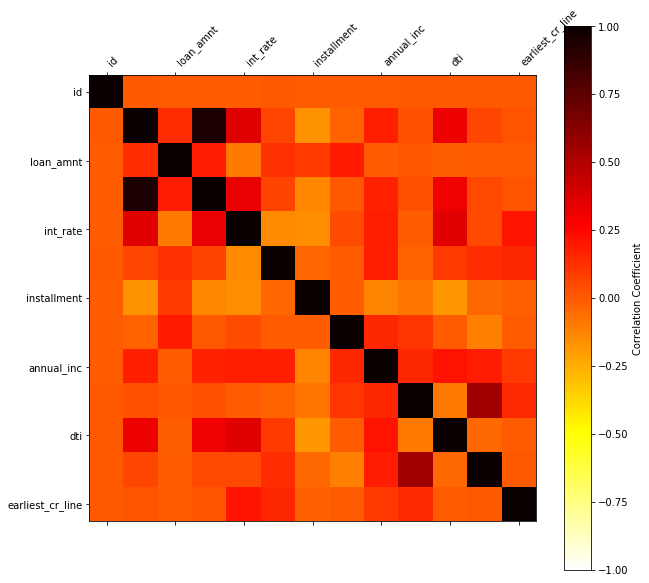

In [50]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

corr_matrix = df_train_aux[df_train_aux.columns[0:15]].corr()

# Figura dimensions
fig = plt.figure(1, figsize=(10,10))
# Only one subplot (111)
ax = fig.add_subplot(111)
labels = ['labels']+corr_matrix.columns.tolist()
ax.set_xticklabels(labels, rotation='45', ha='left')
ax.set_yticklabels(labels, rotation='horizontal', ha='right')

corr_mat_plot = ax.matshow(corr_matrix, cmap=plt.cm.hot_r)
# Con esto indicamos explicitamente que el rango de nuestros valores será -1,1
corr_mat_plot.set_clim([-1,1])
cb = fig.colorbar(corr_mat_plot)
cb.set_label("Correlation Coefficient")

plt.show()

With an analysis like this, we can detect those features that are likely to be removed because, although they are valid in terms of format and completeness, are redundant with other features. Here is shown an example of this: **`loan_amnt` and `installment` have almost 1 correlation, so one of them can be dropped.**  
This process, having up to 90 features once processed, it's better suited analyzing corr matrix, although less graphical

In [51]:
df_columns = df_train_aux.columns
aux = df_train_aux[df_columns[0:71]].copy()
corr_matrix = aux.corr()   #full correlation matrix
corr_matrix

,id,loan_amnt,int_rate,installment,annual_inc,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,zip_code_3digit,cat_term,grade_A,grade_B,grade_C,grade_D
id,1.000000,0.000080,-0.000352,-0.000095,-0.000421,0.000658,-0.002677,-0.002245,-0.002721,0.002354,...,-0.007939,-0.000512,0.001071,-0.003572,-0.001538,-0.001808,-0.005372,0.006386,-0.000021,-0.001930
loan_amnt,0.000080,1.000000,0.134500,0.947891,0.358656,0.061626,-0.165849,-0.025946,0.174521,0.026488,...,0.351607,0.273785,0.360567,0.234927,0.006911,-0.409026,-0.051134,-0.083040,0.041956,0.042791
int_rate,-0.000352,0.134500,1.000000,0.186790,-0.098053,0.121979,0.101301,0.187689,-0.006198,0.014972,...,-0.121193,-0.013948,-0.197841,-0.029002,-0.012768,-0.341203,-0.555051,-0.341395,0.144021,0.376531
installment,-0.000095,0.947891,0.186790,1.000000,0.335667,0.067675,-0.138332,0.003334,0.166524,0.027963,...,0.307724,0.250583,0.328391,0.210482,0.007629,-0.167812,-0.041138,-0.095185,-0.011592,0.073701
annual_inc,-0.000421,0.358656,-0.098053,0.335667,1.000000,-0.142444,-0.156199,0.044314,0.172844,-0.003592,...,0.492198,0.373170,0.346737,0.331213,-0.000665,-0.085910,0.108599,0.001986,-0.044430,-0.037689
dti,0.000658,0.061626,0.121979,0.067675,-0.142444,1.000000,-0.031432,-0.006430,0.174825,-0.024368,...,0.030719,0.186808,0.022275,0.216389,0.015335,-0.055863,-0.079535,-0.042627,0.033131,0.050174
earliest_cr_line,-0.002677,-0.165849,0.101301,-0.138332,-0.156199,-0.031432,1.000000,-0.006423,-0.132656,-0.080252,...,-0.209891,-0.144321,-0.211365,-0.095240,0.002710,0.071210,-0.094489,-0.019110,0.042340,0.044248
inq_last_6mths,-0.002245,-0.025946,0.187689,0.003334,0.044314,-0.006430,-0.006423,1.000000,0.154624,0.108440,...,0.034248,0.036694,0.028505,0.047255,0.003597,0.017597,-0.102932,-0.064529,0.019320,0.082277
open_acc,-0.002721,0.174521,-0.006198,0.166524,0.172844,0.174825,-0.132656,0.154624,1.000000,0.149387,...,0.269547,0.406486,0.386737,0.336744,-0.047118,-0.071334,0.046901,-0.025593,-0.021783,-0.000153
pub_rec,0.002354,0.026488,0.014972,0.027963,-0.003592,-0.024368,-0.080252,0.108440,0.149387,1.000000,...,-0.100129,0.296175,0.148660,-0.013799,0.006147,-0.007732,-0.021564,0.004586,0.008479,-0.002189


In [52]:
df_columns = aux.columns   #to not considerate one-hot columns
cm = corr_matrix.as_matrix()   #to have a bidimensional matriz, instead of DataFrame
print(cm.shape)

#We'll identify those columns (outside diagonal, self) that present over 0.9 correlation, as candidates to be dropped
def check_correls(df_columns, cm, size):
    list_columns_corr = []
    for r, row in enumerate(df_columns):
        if r >= size:   #ignore one-hot fields
            continue
        for c, col in enumerate(df_columns):
            if c != r:
                if r > c:  #to get only lower diagonal of the matrix
                    corr = abs(cm[r,c])
                    if corr > 0.90:
                        list_columns_corr.append((row, col))
    return list_columns_corr
check_correls(df_columns, cm, cm.shape[0])    #use of a function to repeat it once df is revisited

(68, 68)


[('installment', 'loan_amnt'),
 ('revol_util', 'loan_amnt'),
 ('initial_list_status', 'total_acc'),
 ('max_bal_bc', 'pub_rec'),
 ('total_rev_hi_lim', 'tot_cur_bal'),
 ('total_rev_hi_lim', 'total_bal_il'),
 ('num_il_tl', 'earliest_cr_line'),
 ('percent_bc_gt_75', 'total_rec_late_fee'),
 ('tot_hi_cred_lim', 'open_il_12m')]

With this data, we can conclude that a second feature reduction should be reasonable; with **over 0.9 correlation** we will loose little or no information for the models if we drop one of the fields. We'll drop the following ones based on this:
- `installment`
- `inq_last_6mths`
- `pub_rec`
- `total_rec_int`
- `open_il_6m`
- `total_bal_il`
- `mort_acc`
- `num_sats`
- `pct_tl_nvr_dlq`
  
A new version of the processing function is created, to drop all these fields

In [53]:
def transform_dataset_credit_risk_rev(df_in):
    df_out = transform_dataset_credit_risk(df_in)  #to start from the previous point
    df_out.drop(labels=['installment', 'inq_last_6mths', 'pub_rec', 'total_rec_int',
                        'open_il_6m', 'total_bal_il', 'mort_acc', 'num_sats', 'pct_tl_nvr_dlq'],
                axis=1, inplace=True)
    return df_out

df_train_aux = transform_dataset_credit_risk_rev(df_train)   #necessary to start over

df_columns = df_train_aux.columns
aux = df_train_aux[df_columns[0:62]].copy()
corr_matrix = aux.corr()   #full correlation matrix
corr_matrix

,id,loan_amnt,int_rate,annual_inc,dti,earliest_cr_line,open_acc,revol_bal,revol_util,total_acc,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,zip_code_3digit,cat_term,grade_A,grade_B,grade_C,grade_D
id,1.000000,0.000080,-0.000352,-0.000421,0.000658,-0.002677,-0.002721,0.001642,0.003272,0.007284,...,-0.007939,-0.000512,0.001071,-0.003572,-0.001538,-0.001808,-0.005372,0.006386,-0.000021,-0.001930
loan_amnt,0.000080,1.000000,0.134500,0.358656,0.061626,-0.165849,0.174521,0.322715,0.055182,0.021988,...,0.351607,0.273785,0.360567,0.234927,0.006911,-0.409026,-0.051134,-0.083040,0.041956,0.042791
int_rate,-0.000352,0.134500,1.000000,-0.098053,0.121979,0.101301,-0.006198,-0.012871,-0.007149,-0.005939,...,-0.121193,-0.013948,-0.197841,-0.029002,-0.012768,-0.341203,-0.555051,-0.341395,0.144021,0.376531
annual_inc,-0.000421,0.358656,-0.098053,1.000000,-0.142444,-0.156199,0.172844,0.354710,0.047937,0.210514,...,0.492198,0.373170,0.346737,0.331213,-0.000665,-0.085910,0.108599,0.001986,-0.044430,-0.037689
dti,0.000658,0.061626,0.121979,-0.142444,1.000000,-0.031432,0.174825,0.100673,0.135744,0.149872,...,0.030719,0.186808,0.022275,0.216389,0.015335,-0.055863,-0.079535,-0.042627,0.033131,0.050174
earliest_cr_line,-0.002677,-0.165849,0.101301,-0.156199,-0.031432,1.000000,-0.132656,-0.180750,-0.046339,-0.015993,...,-0.209891,-0.144321,-0.211365,-0.095240,0.002710,0.071210,-0.094489,-0.019110,0.042340,0.044248
open_acc,-0.002721,0.174521,-0.006198,0.172844,0.174825,-0.132656,1.000000,0.217973,0.182487,0.095560,...,0.269547,0.406486,0.386737,0.336744,-0.047118,-0.071334,0.046901,-0.025593,-0.021783,-0.000153
revol_bal,0.001642,0.322715,-0.012871,0.354710,0.100673,-0.180750,0.217973,1.000000,-0.039567,-0.001468,...,0.471177,0.400240,0.439235,0.163014,-0.005608,-0.095245,0.030457,-0.014453,-0.006653,-0.005067
revol_util,0.003272,0.055182,-0.007149,0.047937,0.135744,-0.046339,0.182487,-0.039567,1.000000,0.004589,...,-0.055992,0.345556,0.193966,0.006436,0.006352,-0.014939,0.010620,0.001274,-0.005945,-0.005790
total_acc,0.007284,0.021988,-0.005939,0.210514,0.149872,-0.015993,0.095560,-0.001468,0.004589,1.000000,...,-0.000104,0.004393,0.090554,0.021762,-0.018720,-0.006241,0.005904,0.001831,-0.004692,-0.001593


In [54]:
df_columns = aux.columns   #to not considerate one-hot columns
cm = corr_matrix.as_matrix()   #to have a bidimensional matriz, instead of DataFrame
print(cm.shape)

check_correls(df_columns, cm, cm.shape[0])

(59, 59)


[('revol_util', 'loan_amnt'),
 ('initial_list_status', 'total_acc'),
 ('max_bal_bc', 'open_acc'),
 ('total_rev_hi_lim', 'tot_coll_amt'),
 ('total_rev_hi_lim', 'mths_since_rcnt_il'),
 ('percent_bc_gt_75', 'total_rec_late_fee')]

## NaN Check
Check about `NaN` values in Dataset

In [55]:
#With this method, we get a matrix in which every cell answers False (not NaN) or True (NaN)
nan_matrix = df_train_aux.isnull()
print(nan_matrix.shape)

for i, column in enumerate(nan_matrix.columns):
    col = nan_matrix[column]
    print(str(column) + ", tiene " + str(sum(col)) + " nulos")

(76809, 81)
id, tiene 0 nulos
loan_amnt, tiene 0 nulos
int_rate, tiene 0 nulos
annual_inc, tiene 628 nulos
verification_status, tiene 0 nulos
pymnt_plan, tiene 0 nulos
dti, tiene 675 nulos
earliest_cr_line, tiene 0 nulos
open_acc, tiene 535 nulos
revol_bal, tiene 3 nulos
revol_util, tiene 58 nulos
total_acc, tiene 0 nulos
initial_list_status, tiene 0 nulos
out_prncp_inv, tiene 16 nulos
total_pymnt_inv, tiene 0 nulos
total_rec_prncp, tiene 0 nulos
total_rec_late_fee, tiene 0 nulos
recoveries, tiene 0 nulos
tot_coll_amt, tiene 19 nulos
tot_cur_bal, tiene 3 nulos
open_acc_6m, tiene 0 nulos
open_il_12m, tiene 0 nulos
open_il_24m, tiene 0 nulos
mths_since_rcnt_il, tiene 1937 nulos
il_util, tiene 9667 nulos
open_rv_12m, tiene 58 nulos
open_rv_24m, tiene 1 nulos
max_bal_bc, tiene 0 nulos
all_util, tiene 11 nulos
total_rev_hi_lim, tiene 0 nulos
inq_fi, tiene 0 nulos
total_cu_tl, tiene 0 nulos
inq_last_12m, tiene 0 nulos
acc_open_past_24mths, tiene 0 nulos
avg_cur_bal, tiene 2 nulos
bc_open_to_

Several features present NaN values; for those with more than 1.000 (just to set a value) we'll drop the feature. For those with NaN values under that threshold, we'll impute *average* value of the feature. In a real, production intended model, we should first try to get more information about each feature to impute, because in certain cases a *median* impute strategy could be the best option (most common value), of *average*, or *0* or even just dropping the full row.

In [56]:
#Still some features to be removed, same process
#First line are correlation fields, the second one are fields that have too many NaN (over 1.000)
def transform_dataset_credit_risk_rev2(df_in):
    df_out = transform_dataset_credit_risk_rev(df_in)  #to start from the previous point
    df_out.drop(labels=['id', 'dti', 'open_acc', 'mths_since_rcnt_il', 'open_rv_12m', 'num_op_rev_tl'],
                axis=1, inplace=True)
    df_out.drop(labels=['il_util', 'mo_sin_old_il_acct'], axis=1, inplace=True)
    #Features to be removed, once EDA analysis (graphical)
    df_out.drop(labels=['open_il_12m', 'open_acc_6m', 'open_rv_24m', 'inq_fi', 'total_cu_tl', 'inq_last_12m'], 
                axis=1, inplace=True)
    return df_out

df_train_aux = transform_dataset_credit_risk_rev2(df_train)   #start over

In [57]:
#Recalculate NaN status, and impute strategy. We focus only in fields with NaN (avoid rest)
nan_matrix = df_train_aux.isnull()
print(nan_matrix.shape)

#list_NaN_fields = []
for i, column in enumerate(nan_matrix.columns):
    col = nan_matrix[column]
    if sum(col) > 0:
        print(str(column) + ", tiene " + str(sum(col)) + " nulos")

imputer = Imputer() #by default, uses mean
imputer.fit(df_train_aux)
df_imputer = imputer.transform(df_train_aux)

#Rebuild df_train_aux, now withour NaN
df_train_aux = pd.DataFrame(df_imputer, columns=nan_matrix.columns)
print("\n\n----------------------------------------------")
print("Recheck of NaN features:")
nan_matrix = df_train_aux.isnull()
for i, column in enumerate(nan_matrix.columns):
    col = nan_matrix[column]
    if sum(col) > 0:
        print(str(column) + ", tiene " + str(sum(col)) + " nulos")
print("-------------------------------------------")
print("End of recheck of NaN")

(76809, 67)
annual_inc, tiene 628 nulos
revol_bal, tiene 3 nulos
revol_util, tiene 58 nulos
out_prncp_inv, tiene 16 nulos
tot_coll_amt, tiene 19 nulos
tot_cur_bal, tiene 3 nulos
all_util, tiene 11 nulos
avg_cur_bal, tiene 2 nulos
bc_open_to_buy, tiene 842 nulos
bc_util, tiene 874 nulos
mo_sin_old_rev_tl_op, tiene 8 nulos
num_actv_bc_tl, tiene 14 nulos
num_actv_rev_tl, tiene 1 nulos
percent_bc_gt_75, tiene 844 nulos
pub_rec_bankruptcies, tiene 4 nulos
zip_code_3digit, tiene 628 nulos


----------------------------------------------
Recheck of NaN features:
-------------------------------------------
End of recheck of NaN


In [58]:
df_columns = df_train_aux.columns
fields_del = [i for i in range(20, 40)]
print(fields_del)
df_train_aux[df_columns[fields_del]]

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_il_tl,num_rev_accts,num_tl_90g_dpd_24m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort
0,33000.0,2.0,18342.0,21719.000000,13.100000,216.0,16.0,16.0,3.0,4.0,4.0,3.0,6.0,0.0,0.0,0.000000,0.0,0.0,208114.0,17136.0
1,5200.0,0.0,32348.0,3989.000000,23.300000,140.0,62.0,41.0,2.0,2.0,3.0,3.0,3.0,0.0,0.0,33.300000,0.0,0.0,170642.0,12044.0
2,15500.0,4.0,14393.0,5084.000000,48.600000,99.0,9.0,3.0,4.0,5.0,4.0,7.0,9.0,0.0,2.0,50.000000,0.0,0.0,211624.0,52108.0
3,10400.0,1.0,53621.0,4755.000000,43.400000,121.0,29.0,10.0,2.0,3.0,2.0,5.0,7.0,0.0,1.0,50.000000,0.0,0.0,424958.0,17314.0
4,75500.0,11.0,23858.0,10629.000000,73.900000,163.0,9.0,5.0,7.0,8.0,8.0,17.0,26.0,0.0,8.0,75.000000,0.0,0.0,545061.0,137613.0
5,30900.0,7.0,1632.0,17594.000000,11.400000,173.0,6.0,6.0,4.0,7.0,7.0,4.0,15.0,1.0,2.0,33.300000,0.0,0.0,52942.0,19583.0
6,13900.0,7.0,7157.0,3300.000000,38.000000,217.0,15.0,4.0,3.0,4.0,6.0,7.0,10.0,2.0,2.0,0.000000,0.0,0.0,61128.0,50101.0
7,34500.0,6.0,3506.0,12965.000000,44.800000,158.0,2.0,2.0,6.0,11.0,9.0,4.0,18.0,0.0,3.0,22.200000,0.0,0.0,77301.0,56100.0
8,46700.0,11.0,4043.0,32138.000000,2.600000,357.0,6.0,6.0,2.0,3.0,9.0,31.0,25.0,0.0,7.0,0.000000,0.0,0.0,141119.0,72778.0
9,26100.0,4.0,2610.0,4416.000000,74.800000,265.0,10.0,2.0,5.0,9.0,5.0,23.0,20.0,0.0,3.0,60.000000,1.0,0.0,45782.0,28706.0


In [59]:
df_train_aux

,loan_amnt,int_rate,annual_inc,verification_status,pymnt_plan,earliest_cr_line,revol_bal,revol_util,total_acc,initial_list_status,...,lcpd_Jul-2017,lcpd_Jun-2017,lcpd_Mar-2017,lcpd_May-2017,lcpd_Oct-2017,lcpd_Sep-2017,app_type_INDIVIDUAL,app_type_JOINT,app_type_OTHER,target
0,3000.0,7.35,40000.000000,0.0,0.0,0.0,3391.0,10.3,11.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,7500.0,9.93,85000.000000,0.0,0.0,0.0,1211.0,23.3,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,11750.0,30.17,85000.000000,1.0,0.0,1.0,6166.0,39.8,18.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,6025.0,11.49,92000.000000,1.0,0.0,0.0,4386.0,42.2,18.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,17000.0,16.02,112500.000000,1.0,0.0,0.0,46968.0,62.2,47.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5,5000.0,12.74,30000.000000,1.0,0.0,0.0,4712.0,12.9,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,12000.0,11.39,104000.000000,1.0,0.0,0.0,6820.0,49.0,18.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,28000.0,19.99,79371.400000,1.0,0.0,1.0,18670.0,54.1,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8,3600.0,8.24,80000.000000,0.0,0.0,0.0,948.0,2.0,56.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,16000.0,7.97,104000.000000,0.0,0.0,0.0,19037.0,72.9,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


## EDA
Once we have treated features, analyzed correlation for further feature discard, and treated NaN values as well, we can now take a look to the distribution of features.  
In a real scenario, we should review carefully all features (once made this first debranching of features), as valuable information could be found: outlier information / concentration on borders, non-logical distributions, gaps on data bins, etc. Here is an example:

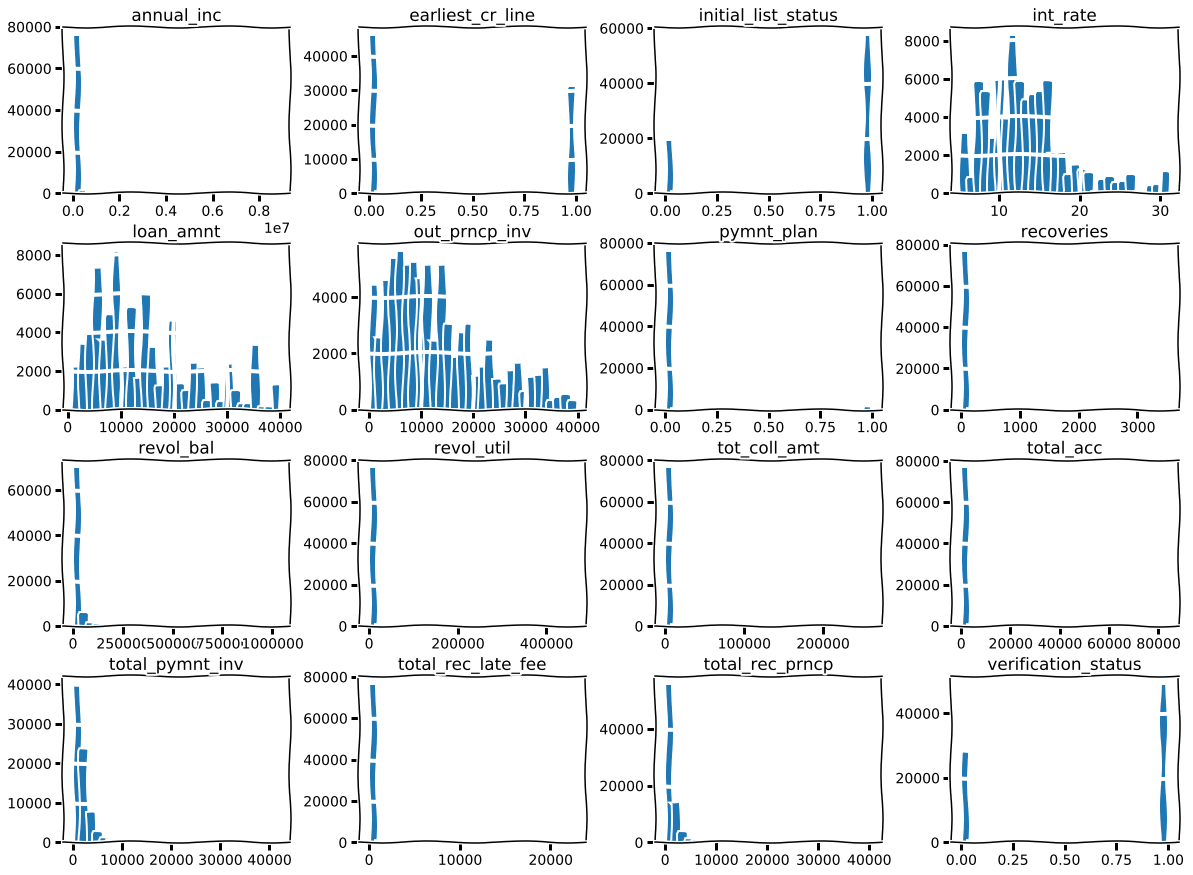

In [60]:
#Let's split df into pieces for easier EDA on each one:
df_columns = df_train_aux.columns
aux = df_train_aux[df_columns[0:16]]
with plt.xkcd():
    aux.hist(bins=30, figsize=(20,15))
    plt.show()

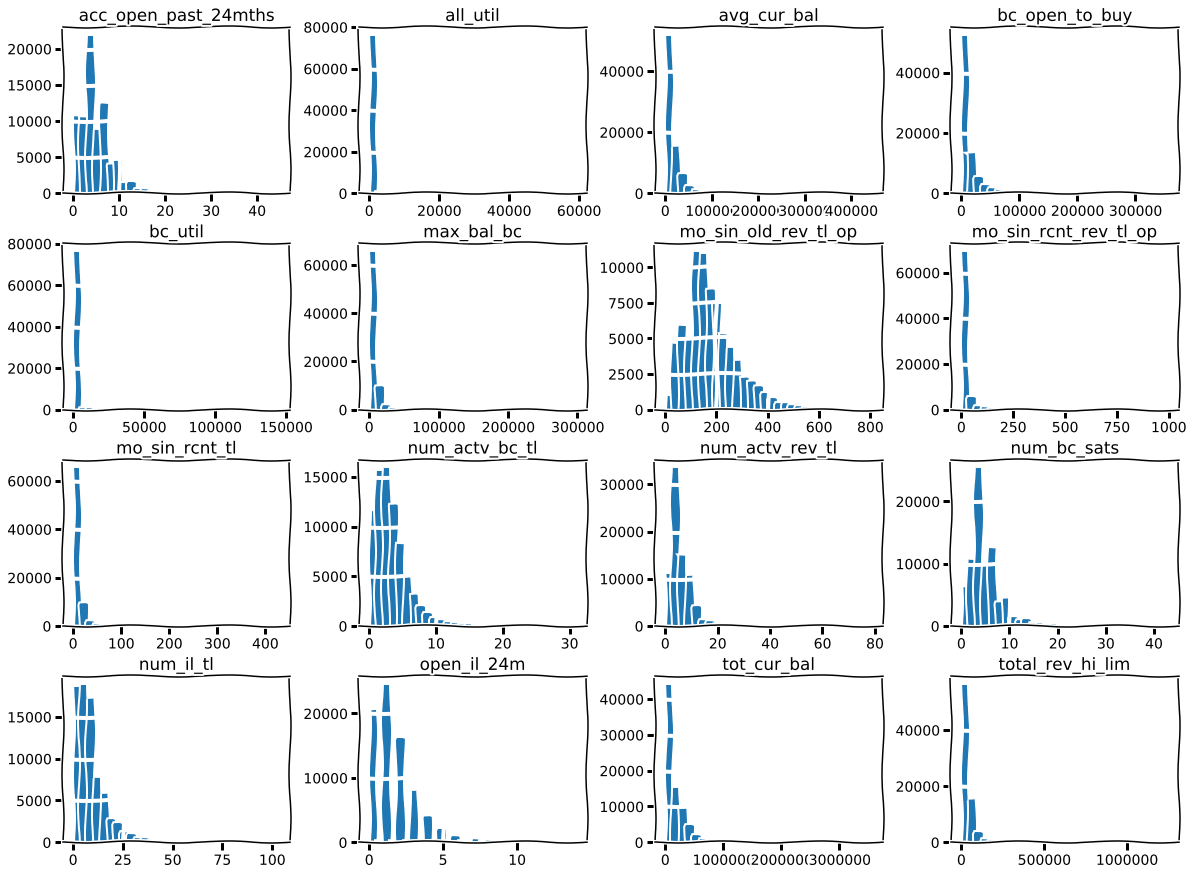

In [61]:
df_columns = df_train_aux.columns
aux = df_train_aux[df_columns[16:32]]
with plt.xkcd():
    aux.hist(bins=30, figsize=(20,15))
    plt.show()

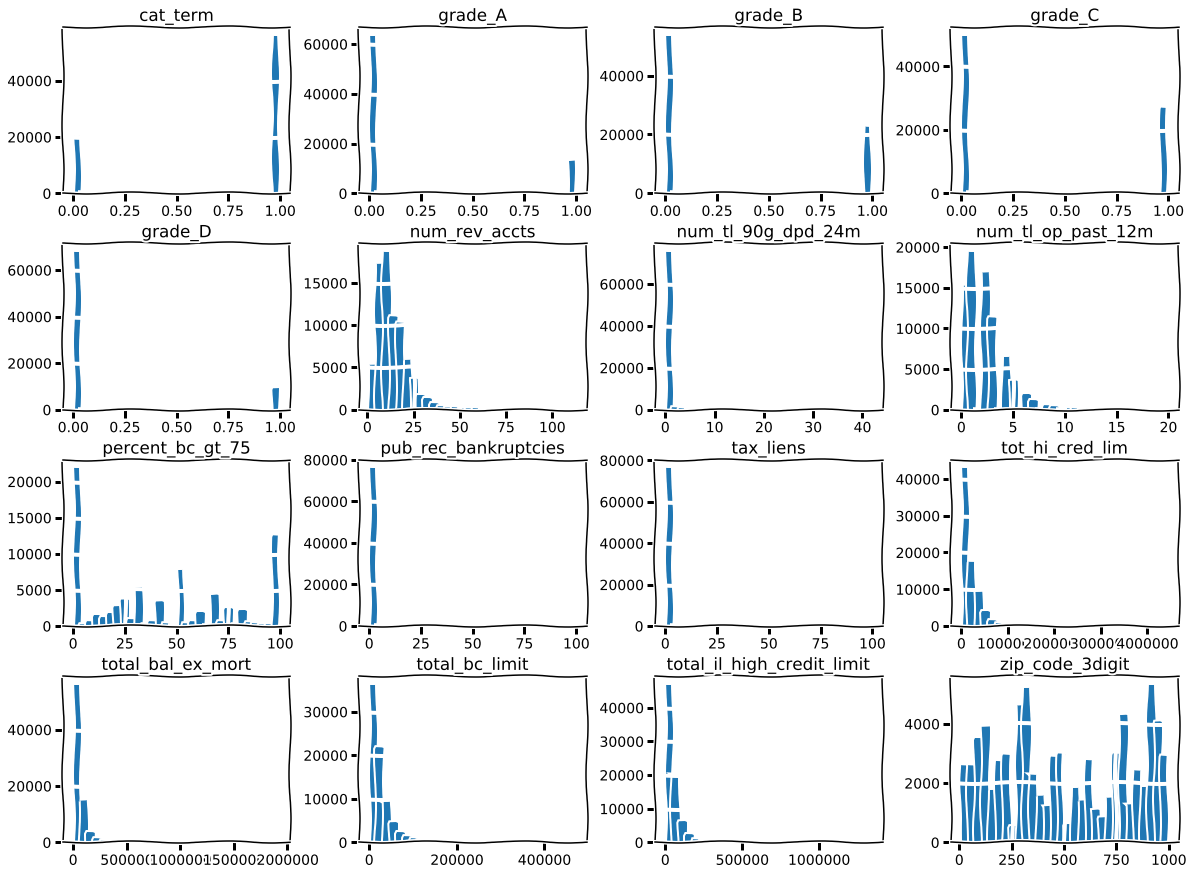

In [62]:
df_columns = df_train_aux.columns
aux = df_train_aux[df_columns[32:48]]
with plt.xkcd():
    aux.hist(bins=30, figsize=(20,15))
    plt.show()

Many fields, just like `all_util`, look to have outliers, maybe that due to errors in the structure of data in same rows (too many field separators). Let's try to identify them:

In [63]:
aux_mean_threshold = abs(df_train_aux.all_util.mean() * 3)   #we consider 3 times the mean as erroneous / outlier value
list_erroneous_rows = list(df_train_aux['all_util'])
list_erroneous_rows = [abs(value) > aux_mean_threshold for value in list_erroneous_rows]
list_erroneous_rows = [i for i, value in enumerate(list_erroneous_rows) if value]   #to get indexes
df_train_aux['all_util'].describe()
df_train_aux = df_train_aux.drop(list_erroneous_rows, axis=0)

df_columns = df_train_aux.columns
fields_del = [i for i in range(20, 40)]
print(fields_del)
df_train_aux[df_columns[fields_del]]

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_il_tl,num_rev_accts,num_tl_90g_dpd_24m,num_tl_op_past_12m,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort
0,33000.0,2.0,18342.0,21719.000000,13.100000,216.0,16.0,16.0,3.0,4.0,4.0,3.0,6.0,0.0,0.0,0.000000,0.0,0.0,208114.0,17136.0
1,5200.0,0.0,32348.0,3989.000000,23.300000,140.0,62.0,41.0,2.0,2.0,3.0,3.0,3.0,0.0,0.0,33.300000,0.0,0.0,170642.0,12044.0
2,15500.0,4.0,14393.0,5084.000000,48.600000,99.0,9.0,3.0,4.0,5.0,4.0,7.0,9.0,0.0,2.0,50.000000,0.0,0.0,211624.0,52108.0
3,10400.0,1.0,53621.0,4755.000000,43.400000,121.0,29.0,10.0,2.0,3.0,2.0,5.0,7.0,0.0,1.0,50.000000,0.0,0.0,424958.0,17314.0
4,75500.0,11.0,23858.0,10629.000000,73.900000,163.0,9.0,5.0,7.0,8.0,8.0,17.0,26.0,0.0,8.0,75.000000,0.0,0.0,545061.0,137613.0
5,30900.0,7.0,1632.0,17594.000000,11.400000,173.0,6.0,6.0,4.0,7.0,7.0,4.0,15.0,1.0,2.0,33.300000,0.0,0.0,52942.0,19583.0
6,13900.0,7.0,7157.0,3300.000000,38.000000,217.0,15.0,4.0,3.0,4.0,6.0,7.0,10.0,2.0,2.0,0.000000,0.0,0.0,61128.0,50101.0
7,34500.0,6.0,3506.0,12965.000000,44.800000,158.0,2.0,2.0,6.0,11.0,9.0,4.0,18.0,0.0,3.0,22.200000,0.0,0.0,77301.0,56100.0
8,46700.0,11.0,4043.0,32138.000000,2.600000,357.0,6.0,6.0,2.0,3.0,9.0,31.0,25.0,0.0,7.0,0.000000,0.0,0.0,141119.0,72778.0
9,26100.0,4.0,2610.0,4416.000000,74.800000,265.0,10.0,2.0,5.0,9.0,5.0,23.0,20.0,0.0,3.0,60.000000,1.0,0.0,45782.0,28706.0


### Feature scale transformation
Before going on with sklearn Transformation class (to inject on a Pipeline) we'll drop a number o columns that are very influenced by extreme outliers (no information enough to transform or treat them) and some others that would befave better with a *logatirmic* or *sqrt*. Al feature graphics of this variables don't seem to follow a Normal or Exponential distribution, they should improve when transformed.
The list of features is as follows:
- open_il_12m    *drop*
- open_acc_6m    *drop*
- open_rv_24m    *drop*
- inq_fi         *drop*
- total_cu_tl    *drop*
- inq_last_12m   *drop*
- verification_status
- earliest_cr_line
- revol_bal
- revol_util
- out_prncp_inv
- total_pymnt_inv
- total_rec_prncp
- total_rec_late_fee
- recoveries
- tot_coll_amt
- open_il_24m
- max_bal_bc
- total_rev_hi_lim
- avg_cur_bal
- bc_open_to_buy
- bc_util
- mo_sin_rcnt_tl
- num_tl_90g_dpd_24m
- pub_rec_bankruptcies
- tot_hi_cred_lim
- total_bal_ex_mort
- total_bc_limit
- total_il_high_credit_limit
  
Drop fields are included in the previous transformation function, to make them permanent. In the following cell, we'll make a test on transforming these fields.  
  
**Further work with features (just like percent_bc_gt_75, among others)

In [64]:
#List of fields to be transformed (sqrt)
list_fields_sqrt = ['verification_status', 'earliest_cr_line', 'revol_bal', 'revol_util', 'out_prncp_inv',
                    'total_pymnt_inv', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries',
                    'tot_coll_amt', 'open_il_24m', 'max_bal_bc', 'total_rev_hi_lim',
                    'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_rcnt_tl', 'num_tl_90g_dpd_24m',
                    'pub_rec_bankruptcies', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 
                    'total_il_high_credit_limit']
#For each of the columns on the list, whe apply np.sqrt() transformation
for col in list_fields_sqrt:
    df_train_aux[col] = df_train_aux[col].map(np.sqrt)

In [65]:
#Let's try to transform one of the variables that is showing big outliers / variation (annual_inc)
#with a Logaritmic transformation. First, let's see its main statistical parameters
for col in df_train_aux.columns:
    print(col)
    print(df_train_aux[col].describe())

#df_train_aux['annual_inc'] = df_train_aux['annual_inc'].map(np.sqrt)

loan_amnt
count    76222.000000
mean     14486.943074
std       9470.955986
min       1000.000000
25%       7000.000000
50%      12000.000000
75%      20000.000000
max      40000.000000
Name: loan_amnt, dtype: float64
int_rate
count    76222.000000
mean        13.277781
std          5.152945
min          5.320000
25%          9.930000
50%         12.620000
75%         15.990000
max         30.990000
Name: int_rate, dtype: float64
annual_inc
count    7.622200e+04
mean     7.996368e+04
std      6.759584e+04
min      0.000000e+00
25%      4.797700e+04
50%      6.700000e+04
75%      9.600000e+04
max      8.900000e+06
Name: annual_inc, dtype: float64
verification_status
count    76222.000000
mean         0.643961
std          0.478830
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: verification_status, dtype: float64
pymnt_plan
count    76222.000000
mean         0.002296
std          0.047861
min          0.000000
25%      

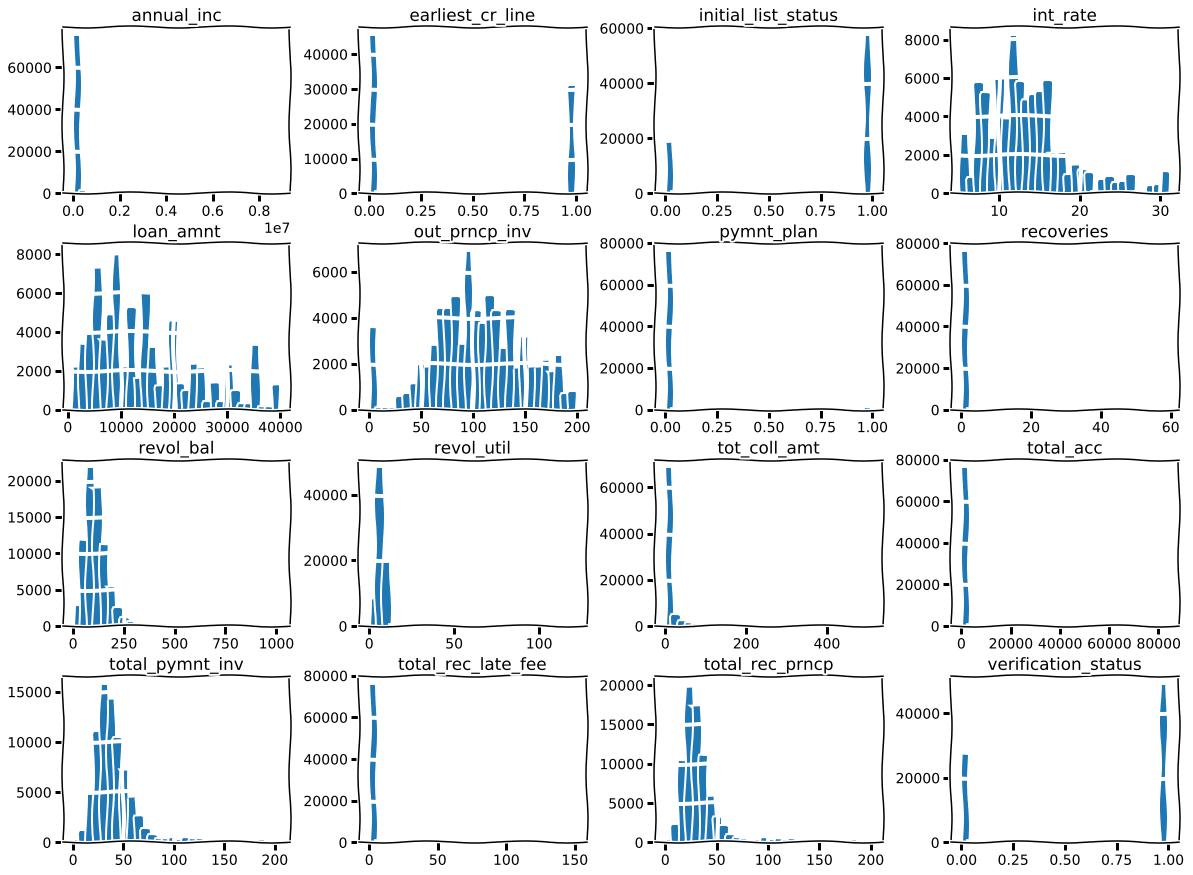

In [66]:
#Let's split df into pieces for easier EDA on each one:
df_columns = df_train_aux.columns
aux = df_train_aux[df_columns[0:16]]
with plt.xkcd():
    aux.hist(bins=30, figsize=(20,15))
    plt.show()

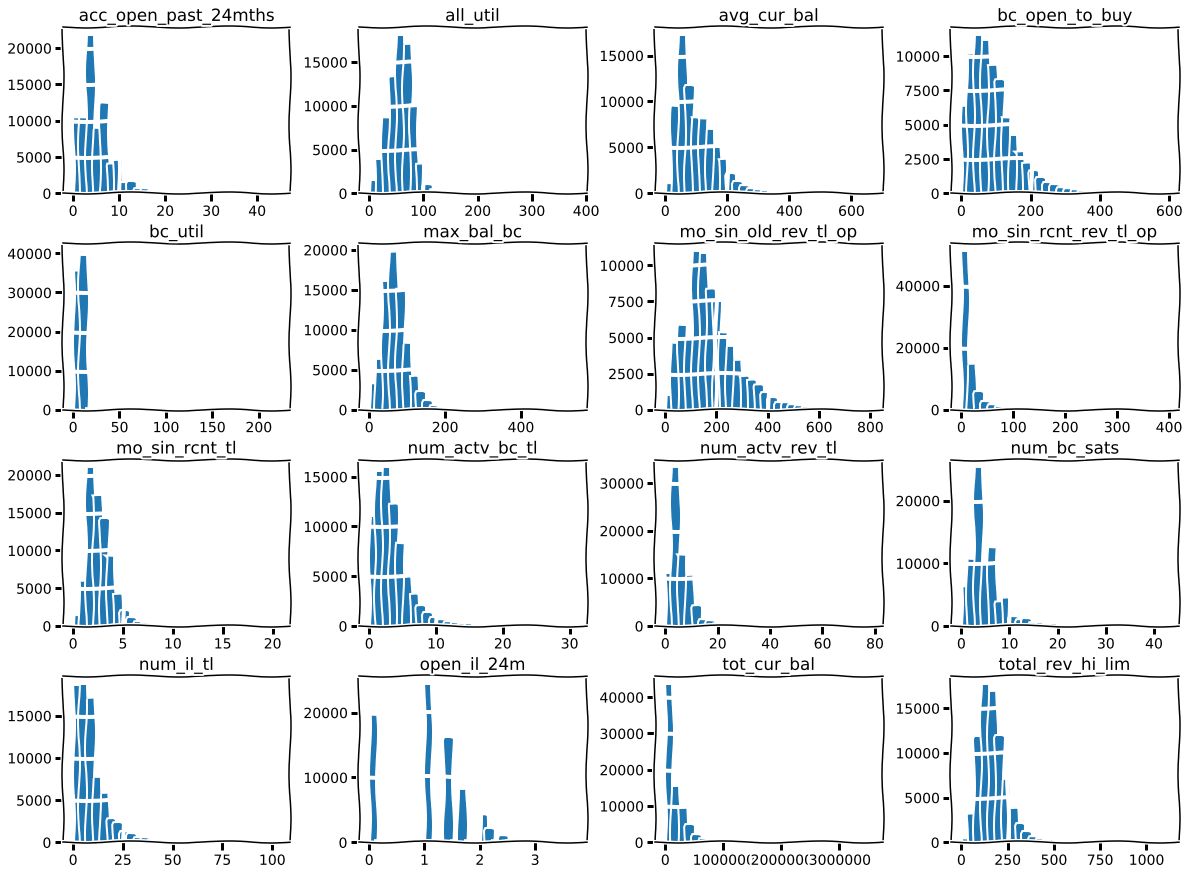

In [67]:
df_columns = df_train_aux.columns
aux = df_train_aux[df_columns[16:32]]
with plt.xkcd():
    aux.hist(bins=30, figsize=(20,15))
    plt.show()

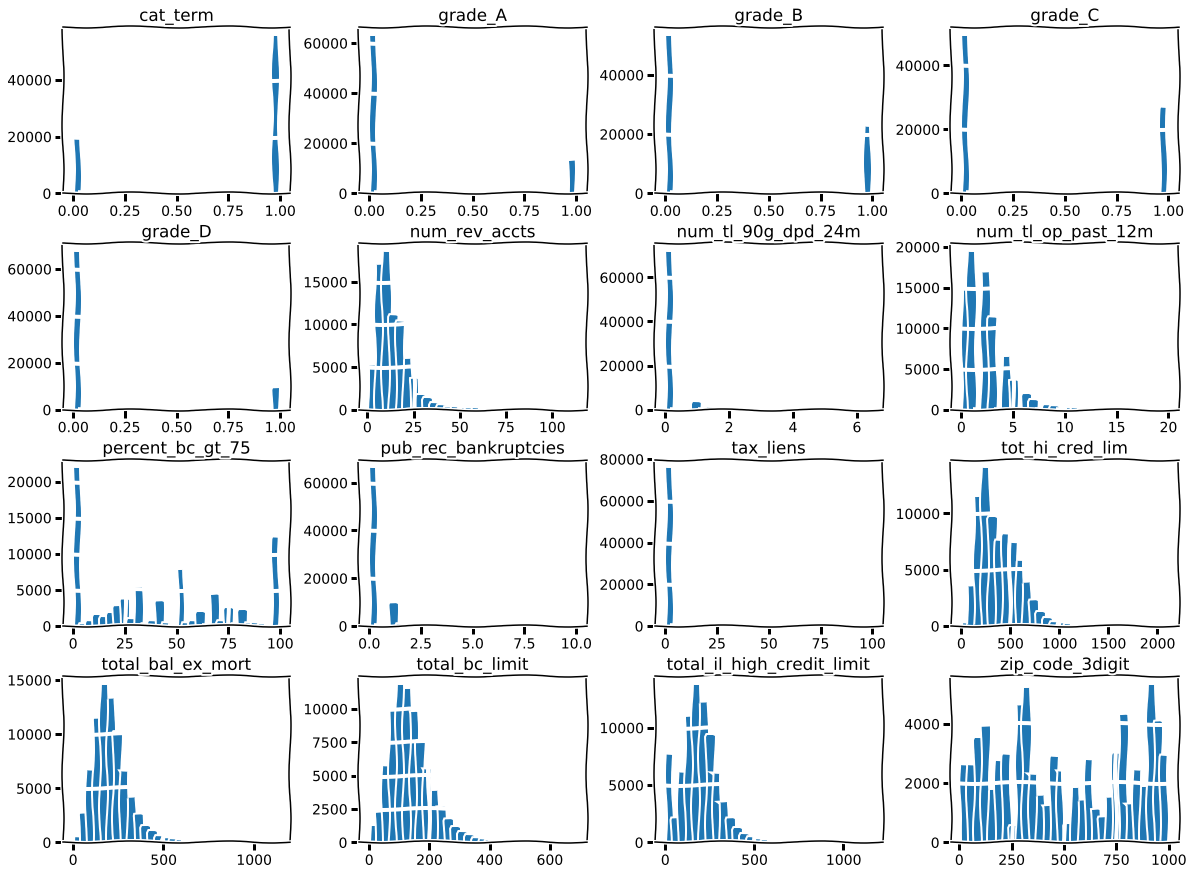

In [68]:
df_columns = df_train_aux.columns
aux = df_train_aux[df_columns[32:48]]
with plt.xkcd():
    aux.hist(bins=30, figsize=(20,15))
    plt.show()

# Model for Credit Risk Evaluation
Once we have reviewd features, done EDA and made our tests with feature transformations (SQRT), it's time to build our models and to check them against *test* DataSet to evaluate. There are some considerations to have in mind at this point:
- ***Transformations*** --> In order to simplify the process of treatment both for *train* and *test*, as well as applying sqrt feature scaling. After that, an *Imputer* is used as previously to fulfull NaN gaps over the dataset. Also, we'll use a *StandardScaler* from sklearn in order to facilitate linear regression work over features. This will be 2 steps on Pipeline
- ***Model/s*** --> once transformed, we'll apply at least *LinearRegression* classifier.
- ***GridSearchCV*** --> for model selection, we'll make use of cross validation approach, with hiperparameters, to pick the best parameter configuration on tested mdoels.
- ***Test dataset evaluation*** --> as the last step, we'll evaluate behaviour against test dataset. For model evaluation we must have in mind that it is a binary classification problem, with very unbalanced class weight (> 96% paid credits, 1, and < 4% default 0), so there are two main posibilities; to strictly focus on *Recall* (ability of the model to not miss on *1* prediction, or F1-score, which gives the same relevance to accuracy on 0's and 1's prediction.

In [74]:
#Class for data transformation of the dataset.
from sklearn.base import BaseEstimator, TransformerMixin
class Transform_DS_CreditRisk(TransformerMixin, BaseEstimator):
    def __init__(self, list_sqrt_tf_fields = []):
        self.list_sqrt_tf_fields = list_sqrt_tf_fields
    # Implements fit_transform(), fit() and transform()
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # To transform, we apply the function transform_dataset_credit_risk_rev2, later on the Imputer
        aux = transform_dataset_credit_risk_rev2(X)

        nan_matrix = aux.isnull()
        imputer = Imputer() #by default, uses mean
        imputer.fit(aux)
        df_imputer = imputer.transform(aux)

        #Rebuild df_train_aux, now withour NaN
        df_out = pd.DataFrame(df_imputer, columns=nan_matrix.columns)

        #For each of the columns on the list, whe apply np.sqrt() transformation
        for col in self.list_sqrt_tf_fields:
            df_out[col] = df_out[col].map(np.sqrt)
        
        return df_out

Pipeline and Model creation. To start, only LinearRegression(), with *recall* scoring, to avoid at maximum to mark as *Fully paid* cases that are really *Default*  
  
Also, we have to consider that `RAcredit_test.csv` file has the same structure as the training one, but target field is empty, so it can only can be used to predict with the model, just like a production scenario. Thus, for validation we'll need to split training file in 2 sets. We'll separate an 80% for cross validation training and 20% for test validation.

In [131]:
#List of models and results for final comparison
lista_modelos_clasificacion = []
#Also, we use the Transformer to get Y_train, Y_test at least
df_in = pd.read_csv("RAcredit_train.csv", sep=",")
df_target = pd.read_csv("RAcredit_test.csv", sep=",")
CRT = Transform_DS_CreditRisk()   #without sqrt feature transformation
CRT_sqrt = Transform_DS_CreditRisk(list_fields_sqrt)   #with sqrt feature transformation
df_train, df_test = train_test_split(df_in, train_size=0.8)
#Aux transformation for train and test
df_train_aux = CRT.transform(df_train)
df_test_aux = CRT.transform(df_test)
df_train_aux_sqrt = CRT_sqrt.transform(df_train)
df_test_aux_sqrt = CRT_sqrt.transform(df_test)
#We prepare y for train (fit)
y_train = df_train_aux['target']
y_test = df_test_aux['target']

In [122]:
print(y_train.shape)
print(df_train_aux.shape)
print(sum(y_train))

(61457,)
(61457, 67)
59306.0


In [115]:
#df_train[df_train.columns[0:-1]]

In [ ]:
#First, we create transforming objects: Transform_DS_CreditRisk and StandardScaler
CR_transformer = Transform_DS_CreditRisk()   #to apply sqrt on every identified field
scaler = StandardScaler()
rfecv = RFECV(estimator=DecisionTreeRegressor())   #to select variables
#We create Logistic Regressor for Clasification
logreg_classif = LogisticRegression()
#We now create the Pipeline
pipeline_logreg = Pipeline(steps=[('scaler', scaler), ('RFECV', rfecv), ('logregcl', logreg_classif)])  
#('CRTf', CR_transformer), 

#Hiperparameters to feed the GridSearchCV Pipepline
hyperparams_pipeline = {
#    "CRTf__list_sqrt_tf_fields": [list_fields_sqrt, None],
    "RFECV__cv": [3],
    "RFECV__scoring": ["neg_mean_squared_error"],
    "scaler__with_mean":[True, False],
    "scaler__with_std":[True, False],
    "logregcl__C": [0.00001, 0.001, 1],
    "logregcl__dual": [False],
    "logregcl__class_weight": ["balanced"],
    "logregcl__fit_intercept": [True]
}

#Creation of GridSearchCV with all parameters
logreg_gs = GridSearchCV(pipeline_logreg, param_grid=hyperparams_pipeline, scoring="recall",
                         cv=5, verbose=1, n_jobs=-1)
#Model fit with df_train
logreg_gs.fit(X=df_train_aux[df_train_aux.columns[0:-1]],
              y=y_train)

In [135]:
####

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 215.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 939.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 1167.8min finished


Best scoring:


NameError: name 'reg_log_gs' is not defined

In [165]:
lista_modelos_clasificacion = []
#Trained. Let's print best scoring and model parameters
print("Best scoring:")
print(logreg_gs.best_score_)
print("Best parameters:")
print(logreg_gs.best_estimator_)
print("RFECV selected the following features as segnificant (bool list):")
featuresRFECV_boolean = logreg_gs.best_estimator_.named_steps['RFECV'].support_
print(featuresRFECV_boolean)
list_selected_features = df_train_aux.columns[featuresRFECV_boolean]
print(list_selected_features)
print("Best params of LogisticRegression:")
print(logreg_gs.best_estimator_.named_steps['logregcl'].coef_)
print("General data for LogisticRegression:")
print(logreg_gs.best_estimator_.named_steps['logregcl'])

#Insertamos en la lista de modelos probados
lista_modelos_clasificacion.append(("Logistic Regression", logreg_gs.best_score_, logreg_gs.best_estimator_))

Best scoring:
0.999528206214
Best parameters:
Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=False, with_std=True)), ('RFECV', RFECV(cv=5,
   estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])
RFECV selected the following features as segnificant (bool list):
[False False False False  True False  True False False False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
Index(['pymnt_plan', 'revol_bal', 'total_rec_prncp', 

In [166]:
#Once that best hyperparameters are identified, we'll reduce options, in order to boost up solution.
#In this case, we potenciate accuracy on 0's (Default on this example), instead of 1's

#Hiperparameters to feed the GridSearchCV Pipepline
hyperparams_pipeline = {
#    "CRTf__list_sqrt_tf_fields": [list_fields_sqrt, None],
    "RFECV__cv": [3],
    "RFECV__scoring": ["neg_mean_squared_error"],
    "scaler__with_mean":[True, False],
    "scaler__with_std":[True],
    "logregcl__C": [0.00001],    #less params to improve performance
    "logregcl__dual": [False],
    "logregcl__class_weight": ["balanced"],
    "logregcl__fit_intercept": [True]
}

#Creation of GridSearchCV with all parameters
#Scoring is now "precision", that focuses on not to fail when class is 0
logreg_gs_precision = GridSearchCV(pipeline_logreg, param_grid=hyperparams_pipeline, scoring="precision",
                                   cv=5, verbose=1, n_jobs=-1)
#Model fit with df_train
logreg_gs_precision.fit(X=df_train_aux[df_train_aux.columns[0:-1]],
                        y=y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 27.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RFECV', RFECV(cv=None,
   estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'logregcl__fit_intercept': [True], 'scaler__with_std': [True], 'RFECV__scoring': ['neg_mean_squared_error'], 'logregcl__dual': [False], 'scaler__with_mean': [True, False], 'logregcl__C': [1e-05], 'logregcl__class_weight': ['balanced'], 'RFECV__cv': [3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=1)

In [167]:
#Trained. Let's print best scoring and model parameters
print("Best scoring:")
print(logreg_gs_precision.best_score_)
print("Best parameters:")
print(logreg_gs_precision.best_estimator_)
print("RFECV selected the following features as segnificant (bool list):")
featuresRFECV_boolean = logreg_gs_precision.best_estimator_.named_steps['RFECV'].support_
print(featuresRFECV_boolean)
list_selected_features = df_train_aux.columns[featuresRFECV_boolean]
print(list_selected_features)
print("Best params of LogisticRegression:")
print(logreg_gs_precision.best_estimator_.named_steps['logregcl'].coef_)
print("General data for LogisticRegression:")
print(logreg_gs_precision.best_estimator_.named_steps['logregcl'])

#Insertamos en la lista de modelos probados
lista_modelos_clasificacion.append(("Logistic Regression - precision", logreg_gs_precision.best_score_, 
                                    logreg_gs_precision.best_estimator_))

Best scoring:
0.976177695253
Best parameters:
Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RFECV', RFECV(cv=3,
   estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])
RFECV selected the following features as segnificant (bool list):
[False False False False  True False False False False False  True  True
  True False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
Index(['pymnt_plan', 'out_prncp_inv', 'total_pymnt_in

In [169]:
#Once that best hyperparameters are identified, we'll reduce options, in order to boost up solution.
#In this case, we use "f1" scoring (balanced between )

#Hiperparameters to feed the GridSearchCV Pipepline
hyperparams_pipeline = {
#    "CRTf__list_sqrt_tf_fields": [list_fields_sqrt, None],
    "RFECV__cv": [3],
    "RFECV__scoring": ["neg_mean_squared_error"],
    "scaler__with_mean":[True, False],
    "scaler__with_std":[True],
    "logregcl__C": [0.00001],    #less params to improve performance
    "logregcl__dual": [False],
    "logregcl__class_weight": ["balanced"],
    "logregcl__fit_intercept": [True]
}

#Creation of GridSearchCV with all parameters
#Scoring is now "f1", that combines recall and precision
logreg_gs_f1 = GridSearchCV(pipeline_logreg, param_grid=hyperparams_pipeline, scoring="f1",
                            cv=5, verbose=1, n_jobs=-1)
#Model fit with df_train
logreg_gs_f1.fit(X=df_train_aux[df_train_aux.columns[0:-1]],
                 y=y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 29.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RFECV', RFECV(cv=None,
   estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'logregcl__fit_intercept': [True], 'scaler__with_std': [True], 'RFECV__scoring': ['neg_mean_squared_error'], 'logregcl__dual': [False], 'scaler__with_mean': [True, False], 'logregcl__C': [1e-05], 'logregcl__class_weight': ['balanced'], 'RFECV__cv': [3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [170]:
#Trained. Let's print best scoring and model parameters
print("Best scoring:")
print(logreg_gs_f1.best_score_)
print("Best parameters:")
print(logreg_gs_f1.best_estimator_)
print("RFECV selected the following features as segnificant (bool list):")
featuresRFECV_boolean = logreg_gs_f1.best_estimator_.named_steps['RFECV'].support_
print(featuresRFECV_boolean)
list_selected_features = df_train_aux.columns[featuresRFECV_boolean]
print(list_selected_features)
print("Best params of LogisticRegression:")
print(logreg_gs_f1.best_estimator_.named_steps['logregcl'].coef_)
print("General data for LogisticRegression:")
print(logreg_gs_f1.best_estimator_.named_steps['logregcl'])

#Insertamos en la lista de modelos probados
lista_modelos_clasificacion.append(("Logistic Regression - F1 scoring", logreg_gs_f1.best_score_, 
                                    logreg_gs_f1.best_estimator_))

Best scoring:
0.970342860209
Best parameters:
Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=False, with_std=True)), ('RFECV', RFECV(cv=3,
   estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])
RFECV selected the following features as segnificant (bool list):
[False False False False  True False  True False False False  True False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
Index(['pymnt_plan', 'revol_bal', 'out_prncp_inv', 't

In [ ]:
#######################################################################################################
# PENDING, DUE TO LONGLASTING EXECUTION
#######################################################################################################
#Now, same parameters, but with sqrt applied to features
#Creation of GridSearchCV with all parameters
#logreg_gs_sqrt = GridSearchCV(pipeline_logreg, param_grid=hyperparams_pipeline, scoring="recall",
#                         cv=10, verbose=1, n_jobs=-1)
#Model fit with df_train
#logreg_gs_sqrt.fit(X=df_train_aux_sqrt[df_train_aux_sqrt.columns[0:-1]],
#              y=y_train)

#Trained. Let's print best scoring and model parameters
#print("Best scoring:")
#print(logreg_gs.best_score_)
#print("Best parameters:")
#print(logreg_gs.best_estimator_)

#Insertamos en la lista de modelos probados
#lista_modelos_clasificacion.append(("Logistic Regression_sqrt", logreg_gs.best_score_, 
#                                    logreg_gs.best_estimator_))

### Result analysis
Once that we have calculated and evaluated models with train sets, we can launch `predict` method and check results

In [171]:
#We'll get each model and compare predictions in test dataset
#1st --> model without sqrt feature transformation
for model in lista_modelos_clasificacion:
    #model = lista_modelos_clasificacion[0]
    model_name = model[0]
    model_score = model[1]
    model_be = model[2]
    print("\nModel: " + model_name)
    y_predict = model_be.predict(df_test_aux[df_test_aux.columns[0:-1]])
    list_diff_predictions = y_predict == y_test    #list of booleans
    print("Total elements: " + str(len(y_test)) + ", with " +  str(sum(list_diff_predictions)) + " successfull")
    print("% of total correct results: " + str(sum(list_diff_predictions) / len(y_test)))
    #Now, we filter the analysis for 'Default' records
    y_test_index = [y == 1.0 for y in list(y_test)]

    list_1_test = [y == 1.0 for y in y_test]
    list_0_test = [y == 0.0 for y in y_test]
    print("Total coincidences for 1: " + str(sum(y_predict[list_1_test])) + " from " + str(sum(list_1_test)))
    print("\t" + str(sum(y_predict[list_1_test]) / sum(list_1_test)) + "%")
    print("Total coincidences for 0: " + str(sum(y_predict[list_0_test])) + " from " + str(sum(list_0_test)))
    print("\t" + str(sum(y_predict[list_0_test]) / sum(list_0_test)) + "%")


Model: Logistic Regression
Total elements: 15375, with 14973 successfull
% of total correct results: 0.973853658537
Total coincidences for 1: 14807.0 from 14815
	0.99946000675%
Total coincidences for 0: 394.0 from 560
	0.703571428571%

Model: Logistic Regression - precision
Total elements: 15375, with 14263 successfull
% of total correct results: 0.927674796748
Total coincidences for 1: 14030.0 from 14815
	0.947013162335%
Total coincidences for 0: 327.0 from 560
	0.583928571429%

Model: Logistic Regression - F1 scoring
Total elements: 15375, with 14973 successfull
% of total correct results: 0.973853658537
Total coincidences for 1: 14807.0 from 14815
	0.99946000675%
Total coincidences for 0: 394.0 from 560
	0.703571428571%


### Execution of the Model (F1 or Recall) over Test Dataset
Once that we have made our tests (we should try other models as well, but I have no time to launch them), it's time to apply it to the test dataset, without known result

In [186]:
#Get the dataset transformed to pass it to predict
df_target['l_state'] = 'Default'    #transform function expects 'Default' or 'Fully Paid', and this DS is all NaN
df_target_aux = CRT.transform(df_target)

for model_item in lista_modelos_clasificacion:
    model_name = model_item[0]
    model_score = model_item[1]
    model_be = model_item[2]
    y_target = model_be.predict(df_target_aux[df_target_aux.columns[0:-1]])
    #Convert to boolean array
    y_target = [y == 1.0 for y in y_target]
    y_target_default_indexes = []    #list to store indexes, one for each
    y_target_paid_indexes = []
    for i, y in enumerate(y_target):
        if y:
            y_target_paid_indexes.append(i)
        else:
            y_target_default_indexes.append(i)
    print("\n-----------------------------------------------------------------------------")
    print("MODEL " + model_name)
    print("-----------------------------------------------------------------------------\n")
    print("PREDICTIONS:")
    print("Fully paid: " + str(len(y_target_paid_indexes)) + " of " + str(len(y_target)) + ", " + 
          str(len(y_target_paid_indexes) / len(y_target)) + "% of total")
    print("Default: " + str(len(y_target_default_indexes)) + " of " + str(len(y_target)) + ", " + 
          str(len(y_target_default_indexes) / len(y_target)) + "% of total")


-----------------------------------------------------------------------------
MODEL Logistic Regression
-----------------------------------------------------------------------------

PREDICTIONS:
Fully paid: 19036 of 19213, 0.990787487638578% of total
Default: 177 of 19213, 0.009212512361421954% of total

-----------------------------------------------------------------------------
MODEL Logistic Regression - precision
-----------------------------------------------------------------------------

PREDICTIONS:
Fully paid: 17950 of 19213, 0.9342632592515484% of total
Default: 1263 of 19213, 0.06573674074845157% of total

-----------------------------------------------------------------------------
MODEL Logistic Regression - F1 scoring
-----------------------------------------------------------------------------

PREDICTIONS:
Fully paid: 19036 of 19213, 0.990787487638578% of total
Default: 177 of 19213, 0.009212512361421954% of total
